# Importamos librerías

In [1]:
# Librerías de toda la vida
import itertools
from tqdm import tqdm
from collections import defaultdict
from collections import Counter
import random
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from scipy import stats
from dask import dataframe as dd
from dask.diagnostics import ProgressBar
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.style as style
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale = 1, rc = {"lines.linewidth": 2.5})

# Creamos una lista con las columnas

In [2]:
columnas = ['periodo', 'id_cli', 'fecha_nacimiento', 'edad', 'genero', 'estado_civil', 'nivel_academico', 'profesion', 'ocupacion', 'tipo_vivienda', 'ult_actual',
'categoria', 'codigo_ciiu', 'ind_mora_vigente', 'cartera_castigada', 'ciudad_residencia', 'departamento_residencia', 'ciudad_laboral', 'departamento_laboral',
'rechazo_credito', 'mora_max', 'cant_moras_30_ult_12_meses', 'cant_moras_60_ult_12_meses', 'cant_moras_90_ult_12_meses', 'cupo_total_tc', 'tenencia_tc',
'cuota_tc_bancolombia', 'tiene_consumo', 'tiene_crediagil', 'nro_tot_cuentas', 'ctas_activas', 'tiene_ctas_activas', 'ctas_embargadas', 'tiene_ctas_embargadas',
'pension_fopep', 'cuota_cred_hipot', 'tiene_cred_hipo_1', 'tiene_cred_hipo_2', 'mediana_nom3', 'mediana_pen3', 'ingreso_nompen', 'cat_ingreso', 'ingreso_final',
'cant_mora_30_tdc_ult_3m_sf', 'cant_mora_30_consum_ult_3m_sf', 'cuota_de_vivienda', 'cuota_de_consumo', 'cuota_rotativos', 'cuota_tarjeta_de_credito',
'cuota_de_sector_solidario', 'cuota_sector_real_comercio', 'cupo_tc_mdo', 'saldo_prom3_tdc_mdo', 'cuota_tc_mdo', 'saldo_no_rot_mdo', 'cuota_libranza_sf',
'cant_oblig_tot_sf', 'cant_cast_ult_12m_sr', 'ind', 'rep_calif_cred', 'pol_centr_ext', 'convenio_lib', 'ingreso_nomina', 'ingreso_segurida_social',
'gasto_familiar']

# Importamos el dataset

In [3]:
from dask import dataframe as dd
from dask.diagnostics import ProgressBar

missing_values = [r"\\N", r"\N"]
with ProgressBar():
 df = dd.read_csv('Dataton_train_semicolon.csv', encoding = 'utf8', sep=";", names = columnas, low_memory = True,
                  header = None, error_bad_lines = True, na_values = missing_values, assume_missing = True,
 dtype={"periodo" : object,
 "id_cli" : np.uint32,
"fecha_nacimiento" : object,
"edad" : object,
"genero" : object,
"estado_civil" : object,
"nivel_academico" : object,
"profesion" : object,
"ocupacion" : object,
"tipo_vivienda" : object,
"ult_actual" : np.float,#convertir
"categoria" : np.float,
"codigo_ciiu" : np.float,
"ind_mora_vigente" : object,
"cartera_castigada" : object,
"ciudad_residencia" : object,
"departamento_residencia" : object,
"ciudad_laboral" : object,
"departamento_laboral" : object,
"rechazo_credito" : object,
"mora_max" : np.float,
"cant_moras_30_ult_12_meses" : np.float,
"cant_moras_60_ult_12_meses" : np.float,
"cant_moras_90_ult_12_meses" : np.float,
"cupo_total_tc" : np.float,
"tenencia_tc" : object,
"cuota_tc_bancolombia" : np.float,
"tiene_consumo" : object,
"tiene_crediagil" : object,
"nro_tot_cuentas" : np.float,
"ctas_activas" : np.float,
"tiene_ctas_activas" : object,
"ctas_embargadas" : np.float,
"tiene_ctas_embargadas" : object,
"pension_fopep" : object,
"cuota_cred_hipot" : np.float,
"tiene_cred_hipo_1" : object,
"tiene_cred_hipo_2" : object,
"mediana_nom3" : np.float,
"mediana_pen3" : np.float,
"ingreso_nompen" : np.float,
"cat_ingreso" : object,
"ingreso_final" : np.float,
"cant_mora_30_tdc_ult_3m_sf" : np.float,
"cant_mora_30_consum_ult_3m_sf" : np.float,
"cuota_de_vivienda" : np.float,
"cuota_de_consumo" : np.float,
"cuota_rotativos" : np.float,
"cuota_tarjeta_de_credito" : np.float,
"cuota_de_sector_solidario" : np.float,
"cuota_sector_real_comercio" : np.float,
"cupo_tc_mdo" : np.float,
"saldo_prom3_tdc_mdo" : np.float,
"cuota_tc_mdo" : np.float,
"saldo_no_rot_mdo" : np.float,
"cuota_libranza_sf" : np.float,
"cant_oblig_tot_sf" : np.float,
"cant_cast_ult_12m_sr" : np.float,
"ind" : np.float,
"rep_calif_cred" : object,
"pol_centr_ext" : np.float,
"convenio_lib" : object,
"ingreso_nomina" : np.float,
"ingreso_segurida_social" : np.float,
"gasto_familiar" : np.float,
 })
df.head()

#df = dd.read_csv(filename, header=None, names = list_, blocksize=64000000, low_memory=False)

,periodo,id_cli,fecha_nacimiento,edad,genero,estado_civil,nivel_academico,profesion,ocupacion,tipo_vivienda,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,ciudad_residencia,departamento_residencia,ciudad_laboral,departamento_laboral,rechazo_credito,mora_max,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,cupo_total_tc,tenencia_tc,cuota_tc_bancolombia,tiene_consumo,tiene_crediagil,nro_tot_cuentas,ctas_activas,tiene_ctas_activas,ctas_embargadas,tiene_ctas_embargadas,pension_fopep,cuota_cred_hipot,tiene_cred_hipo_1,tiene_cred_hipo_2,mediana_nom3,mediana_pen3,ingreso_nompen,cat_ingreso,ingreso_final,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,cuota_de_vivienda,cuota_de_consumo,cuota_rotativos,cuota_tarjeta_de_credito,cuota_de_sector_solidario,cuota_sector_real_comercio,cupo_tc_mdo,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar
0,201908,2089776,19840630,35.05817932922655,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,20180526.0,1.0,10.0,N,N,CALI ...,VALLE ...,CALI ...,VALLE ...,NaN,NaN,NaN,NaN,NaN,0.0,NO,0.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,NaN,NaN,NaN,1255032.0,0.0,1255032.0,NOM,1173431.0,0.0,0.0,0.0,275000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,903000.0,0.0,1.0,0.0,311715.5,C,0.0,NaN,1255032.0,NaN,232526.0
1,201909,2089776,19840630,35.14305270362765,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,20180526.0,1.0,10.0,N,N,CALI ...,VALLE ...,CALI ...,VALLE ...,NaN,NaN,NaN,NaN,NaN,0.0,NO,0.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,NaN,NaN,NaN,1255032.0,0.0,1255032.0,NOM,1173431.0,0.0,0.0,0.0,275000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,903000.0,0.0,1.0,0.0,311715.5,C,0.0,NaN,1255032.0,NaN,265900.0
2,201907,2089776,19840630,34.96235455167693,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,20180526.0,1.0,10.0,N,N,CALI ...,VALLE ...,CALI ...,VALLE ...,NaN,NaN,NaN,NaN,NaN,0.0,NO,0.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,NaN,NaN,NaN,1255032.0,0.0,1255032.0,NOM,1172612.0,0.0,0.0,0.0,275000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,903000.0,0.0,1.0,0.0,311306.0,C,0.0,NaN,1255032.0,NaN,243052.0
3,201903,2089776,19840630,34.63928815879535,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,20180526.0,1.0,10.0,N,N,CALI ...,VALLE ...,CALI ...,VALLE ...,NaN,NaN,NaN,NaN,NaN,0.0,NO,0.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,NaN,NaN,NaN,1282673.0,0.0,1282673.0,NOM,1172612.0,0.0,0.0,0.0,275000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2433000.0,0.0,1.0,0.0,311306.0,C,0.0,NaN,1172612.0,NaN,276014.0
4,201911,2089776,19840630,35.30732375085558,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,20180526.0,1.0,10.0,N,N,CALI ...,VALLE ...,CALI ...,VALLE ...,NaN,NaN,NaN,NaN,NaN,0.0,NO,0.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,NaN,NaN,NaN,1255032.0,0.0,1255032.0,NOM,1355032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,677516.0,C,0.0,NaN,1255032.0,NaN,418866.0


# Creamos una muestra

In [4]:
with ProgressBar():
 df = df.sample(frac = 0.15, random_state = 42).compute()
df.head()

[########################################] | 100% Completed |  2min  7.7s


,periodo,id_cli,fecha_nacimiento,edad,genero,estado_civil,nivel_academico,profesion,ocupacion,tipo_vivienda,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,ciudad_residencia,departamento_residencia,ciudad_laboral,departamento_laboral,rechazo_credito,mora_max,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,cupo_total_tc,tenencia_tc,cuota_tc_bancolombia,tiene_consumo,tiene_crediagil,nro_tot_cuentas,ctas_activas,tiene_ctas_activas,ctas_embargadas,tiene_ctas_embargadas,pension_fopep,cuota_cred_hipot,tiene_cred_hipo_1,tiene_cred_hipo_2,mediana_nom3,mediana_pen3,ingreso_nompen,cat_ingreso,ingreso_final,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,cuota_de_vivienda,cuota_de_consumo,cuota_rotativos,cuota_tarjeta_de_credito,cuota_de_sector_solidario,cuota_sector_real_comercio,cupo_tc_mdo,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar
25120,201907,3965564,19890316,30.25325119780972,M,CASADO,SIN INFORMACION,OTROS,Empleado,NaN,20180909.0,1.0,10.0,N,N,BOGOTA D.C. ...,BOGOTA D.C. ...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NO,0.0,NaN,X,1.0,1.0,X,0.0,NaN,NaN,753023.3,X,NaN,4302445.0,0.0,4302445.0,NOM,4251824.00,0.0,0.0,753023.3,2340000.0,246000.0,0.0,0.0,0.0,0.0,0.0,0.0,46663000.0,0.0,3.0,0.0,-4.047465e+05,C,0.0,72318,4189346.0,NaN,2968027.28
73962,201911,2297695,19780805,41.21013004791239,M,CASADO,UNIVERSITARIO,INGENIERIA DE SISTEMAS,Empleado,FAMILIAR,20190803.0,3.0,10.0,N,N,BOGOTA D.C. ...,BOGOTA D.C. ...,BOGOTA D.C. ...,BOGOTA D.C. ...,NaN,16.0,0.0,0.0,0.0,0.0,NO,0.0,NaN,X,1.0,1.0,X,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,6399950.00,0.0,0.0,0.0,288000.0,132000.0,1354000.0,0.0,0.0,20800000.0,13306000.0,3010000.0,31505000.0,0.0,9.0,0.0,-4.470298e+05,B,0.0,NaN,NaN,NaN,5982828.00
44294,201907,2593020,19670318,52.24914442162902,M,NO INFORMA,NO INFORMA,NaN,Empleado,NaN,20190419.0,1.0,10.0,N,N,BARRANQUILLA ...,ATLANTICO ...,SOLEDAD - SOLEDAD ...,ATLANTICO ...,NaN,0.0,0.0,0.0,0.0,0.0,NO,0.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,2039000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.039890e+06,D,0.0,NaN,NaN,NaN,111231.00
91615,202003,2317746,19870411,32.85968514715948,M,UNION LIBRE,TECNOLOGO,NINGUNA,Empleado,NaN,20191212.0,1.0,10.0,N,N,BARRANCABERMEJA ...,SANTANDER ...,BARRANCABERMEJA ...,SANTANDER ...,NaN,1.0,0.0,0.0,0.0,0.0,NO,0.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,2355865.18,0.0,0.0,801000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10930000.0,0.0,1.0,0.0,4.004912e+05,H,8.0,NaN,NaN,NaN,247185.00
83122,201907,1327876,19760810,42.85010266940452,M,UNION LIBRE,UNIVERSITARIO,OTROS,Empleado,PROPIA,20180205.0,2.0,10.0,N,N,BOGOTA D.C. ...,BOGOTA D.C. ...,MEDELLIN ...,ANTIOQUIA ...,NaN,0.0,0.0,0.0,0.0,15000000.0,SI,645000.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,NaN,NaN,NaN,5036945.0,0.0,5036945.0,NOM,6533199.00,0.0,0.0,1186000.0,3372000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159999000.0,780000.0,3.0,0.0,-1.315747e+06,B,0.0,NaN,5042930.0,6210000.0,633835.00


# Visualización con DTale

In [5]:
import dtale
dtale.show(df)

In [6]:
df_backup = df.copy()

In [7]:
#df=df_backup.copy()

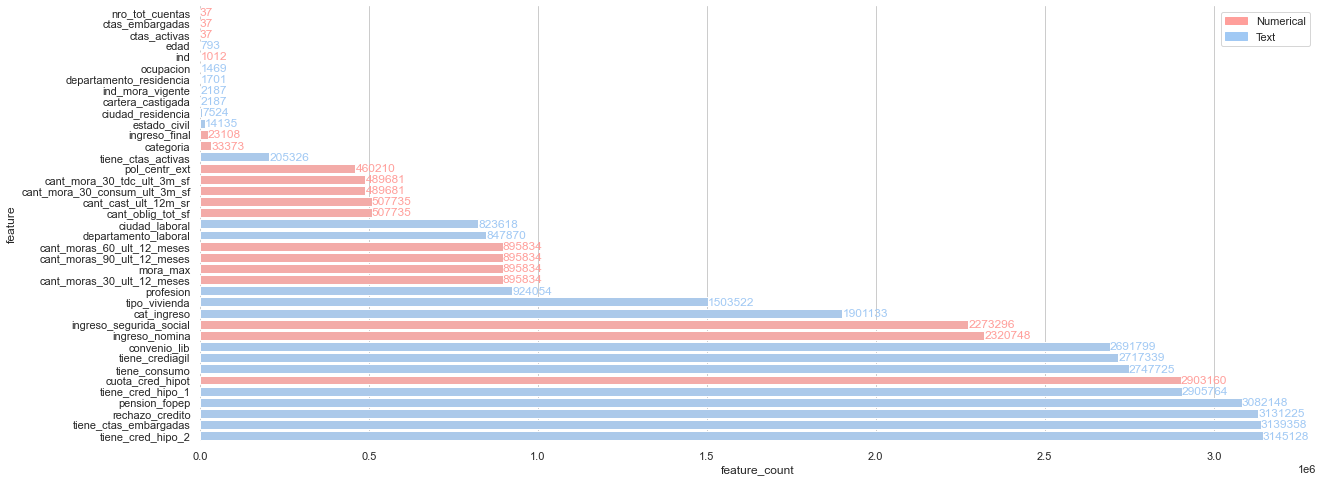

In [8]:
# missing by category / create df
list_missing_feats = [a for a in df.columns if (df[a].isnull().sum() > 0) & (not a == 'SalePrice')] # ex target
list_numerical_feats = [n for n in df.select_dtypes(include=['number']).columns] # all numeric datatypes
df_missing = pd.DataFrame(list_missing_feats, columns=['feature']) # cast to df (makes it easier)

# build missing df
df_missing['feature_count'] = df_missing.apply(lambda x: df[x['feature']].isnull().sum(), axis=1) # count the no of missing features
df_missing['feature_type'] = np.where(df_missing['feature'].isin(list_numerical_feats), 'number', 'text')
df_missing = df_missing.sort_values('feature_count').reset_index(drop=True) # sort
df_missing['meh'] = 'x'
df_missing['feature_rank'] = df_missing.sort_values(['feature_count'], ascending=[True]).groupby(['meh']).cumcount() # great sql like function for ranking groups

# create plot
f, ax = plt.subplots(figsize = (20,8))
sns.set_color_codes('pastel')
palette = ['r' if (x == 'number') else 'b' for x in df_missing['feature_type']] # if number then red else blue
z = sns.barplot(x='feature_count', y='feature', data=df_missing, label='Total', palette=palette, edgecolor='w')

# enum each row / add label
for index, row in df_missing.iterrows():
    text_col = 'b'
    if row.feature_type == 'number': text_col = 'r'
    z.text(row.feature_count + 15, row.feature_rank, str(row.feature_count), color=text_col, va="center")

# format plot
patch_num = mpatches.Patch(color='r', label='Numerical')
patch_text = mpatches.Patch(color='b', label='Text')
ax.legend(handles=[patch_num, patch_text])
sns.despine(left = True, bottom = True)
plt.show()

### **0. Sacamos las filas duplicadas y convertimos el indice a formato id_cliperiodo**

In [9]:
# we know that column 'id' is unique, but what if we drop it?
df_dedupped = df.drop_duplicates()

# there were duplicate rows
print(df.shape)
print(df_dedupped.shape)

(3148304, 65)
(3148304, 65)


In [10]:
df = df_dedupped.copy()

In [11]:
df["id_cliperiodo"]=df["id_cli"].astype(str) + str("#") + df["periodo"].astype(str)

In [12]:
df.set_index("id_cliperiodo", inplace=True)
df.index.name = None

#### Eliminamos la columna id_cli

In [13]:
df.drop(columns="id_cli",inplace=True)

### **1. Cambiamos el formato de las fechas**

In [14]:
# Arreglamos formato en fechas
df['periodo'] = dd.to_datetime(df['periodo'], format="%Y%m", errors='coerce')
df['fecha_nacimiento'] = dd.to_datetime(df['fecha_nacimiento'], format="%Y%m%d", errors='coerce')
df['ult_actual'] = dd.to_datetime(df['ult_actual'], format="%Y%m%d", errors='coerce')

In [15]:
now = pd.Timestamp('now')
df.fecha_nacimiento = df.fecha_nacimiento.fillna(df.fecha_nacimiento.mean())
df['edad'] = (now - df['fecha_nacimiento']).astype('<m8[Y]')
df['edad'] = df['edad'].astype(float)
df['edad'] = df['edad'].astype(int)

In [16]:
df.shape

(3148304, 64)

### **2. Imputamos los valores faltantes de ingreso final con la media**

In [17]:
#Imputamos el valor promedio de los valores faltantes de ingreso_final(0.74%)
df.ingreso_final = df.ingreso_final.fillna(df.ingreso_final.mean())

### Eliminamos los valores negativos de cuota credito hipotecario y gasto familiar

In [18]:
df["cuota_cred_hipot"]=df["cuota_cred_hipot"].fillna(0)

In [19]:
df = df.loc[((df['cuota_cred_hipot'] >= 0) & (df['gasto_familiar'] >= 0))]

In [20]:
df.shape

(3148291, 64)

### **3. Mapeamos cada periodo con el gasto_familiar promedio de ese periodo dividido en el promedio de gasto de ese año**

In [21]:
# PRIMERO HACER TODAS LAS TRANSFORMACIONES Y ADECUACIONES DE DE LA VARIABLE GASTO_FAMILIAR
df.loc[:,"periodo"]=pd.to_datetime(df["periodo"])
df.loc[:,"ano"]=df.loc[:,"periodo"].dt.year
dicc_periodo=df.groupby(by="periodo").mean().gasto_familiar.to_dict()
dicc_ano=df.groupby(by="ano").mean().gasto_familiar.to_dict()

In [22]:
df.loc[:,"gasto_x_periodo"]=df["periodo"].map(dicc_periodo)
df.loc[:,"ano"]=df["ano"].map(dicc_ano)

In [23]:
df.loc[:,"rel_period_ano"] = df.loc[:,"gasto_x_periodo"] / df.loc[:,"ano"]

In [24]:
df= df.drop(columns=["periodo","ano","gasto_x_periodo"])

#### fecha_nacimiento

In [25]:
# Opción 1: Reformatear a tipo fecha, tratar outliers, después de calcular la edad eliminar
df.loc[:,'fecha_nacimiento'] = pd.to_datetime(df.fecha_nacimiento)
df.loc[:,'fecha_nacimiento'] = df['fecha_nacimiento'].dt.date
# Consideramos outliers a aquellas personas nacidas antes de 1916 o después de 2003
fecha_min = dt.datetime.strptime("1911/01/01", "%Y/%m/%d").date()
fecha_max = dt.datetime.strptime("2003/01/01", "%Y/%m/%d").date()
outliers_fecha_nac = df.loc[(df["fecha_nacimiento"]<fecha_min) | (df["fecha_nacimiento"]>fecha_max)]
df.drop(outliers_fecha_nac.index, inplace=True)

In [26]:
df['fecha_nacimiento'].isna().sum()

0

#### edad

In [27]:
# Opción 1: Recalcular la edad a partir de la fecha de nacimiento y luego eliminar la columna fecha_nacimiento
now = dt.date.today()
df.fecha_nacimiento = df.fecha_nacimiento.fillna(df.fecha_nacimiento.mode()[0]) #No tiene valores faltantes pero por las dudas
df['edad'] = (now - df['fecha_nacimiento']).astype('<m8[Y]')
df['edad'] = df['edad'].astype(float)
df['edad'] = df['edad'].astype(int) 
df.edad.unique()
df.drop(columns="fecha_nacimiento", inplace=True)

In [28]:
df['edad'].isna().sum()

0

#### genero

In [29]:
#Opción 1: Reemplazar los valores faltantes por la moda y luego hacer variables dummies
nan_genero=(df["genero"]!= 'M') & (df["genero"]!= 'F')
df.loc[nan_genero,"genero"]=df.genero.mode()[0]
df.genero.unique()

array(['M', 'F'], dtype=object)

In [30]:
df = pd.get_dummies (df, columns = ['genero'])
# Opcional eliminar una de las columnas
df.drop(columns="genero_F", inplace = True)

#### profesion

In [31]:
# Opción 1: Reemplazar los valores categóricos en base al ingreso_final promedio agrupado por profesion dividido en el ingreso_final promedio total. 
# Imputar los valores faltantes por el promedio.
dicc_profesion = (df.groupby(by = "profesion").mean().ingreso_final/(df["ingreso_final"].mean())).to_dict()
df["ingreso_final_x_profesion"] = df["profesion"].map(dicc_profesion)
df["ingreso_final_x_profesion"] = df["ingreso_final_x_profesion"].fillna(1)
df.drop(columns="profesion", inplace=True)
df.ingreso_final_x_profesion.unique()

array([1.00975934, 0.96787483, 1.        , 1.01186607, 1.03615964,
       1.13373702, 1.40278548, 0.99712505, 1.14036222, 1.22644196,
       1.12683876, 1.3273752 , 1.31542014, 1.47773142, 0.71184695,
       0.60843304, 1.04283897, 0.68681196, 1.15054887, 0.71454968,
       0.87729504, 0.63199762, 0.87268254, 1.23809005, 1.07867235,
       0.91626165, 0.67686196, 0.8333164 , 0.76716999, 1.06447205,
       0.85292255, 0.90910297, 0.66769874, 0.76089669, 0.85420041,
       0.95429417, 0.79462926, 0.82167454, 0.62141598, 1.13588939,
       0.69233301, 0.84820404, 1.11122027, 0.79958817, 0.8043492 ,
       0.80099584, 0.5012628 , 0.78095245, 0.70761972, 0.73729051,
       0.84503624, 1.17364753, 1.52271349, 1.89638976, 0.91908973,
       0.65666243, 0.94042849, 1.09308096, 1.54810038, 0.86784716,
       0.66354761, 1.750495  , 0.80544678, 1.61439995, 0.70500784,
       0.77591222, 1.07584166, 1.6734883 , 1.21724044, 0.96523853,
       1.00089775, 1.76247912, 1.86592507, 0.74307441, 0.98837

#### ocupacion

In [32]:
# Opción 1: Reemplazar los valores categóricos en base al ingreso_final promedio agrupado por ocupacion dividido en el ingreso_final promedio general. Imputar los valores faltantes por el promedio.
df.ocupacion.unique()

array(['Empleado', 'Independiente', 'Estudiante',
       'Profesional Independiente', 'Ama de Casa', 'Jubilado',
       'Pensionado', 'Comerciante', 'Socio Empleado - Socio',
       'Desempleado sin Ingresos', 'Otro', 'Rentista de Capital',
       'Sin Ocupacion Asignada', 'Ganadero', 'Agricultor',
       'Desempleado con Ingresos', nan, 'Vacío'], dtype=object)

In [33]:
nan_ocupacion=(df["ocupacion"]=="Vacío") | (df["ocupacion"]=="Vacio") | (df["ocupacion"].isna())
df.loc[nan_ocupacion,"ocupacion"]=float("nan")
df.ocupacion.isna().sum()

1514

In [34]:
dicc_ocupacion=(df.groupby(by="ocupacion").mean().ingreso_final/(df["ingreso_final"].mean())).to_dict()
df["ingreso_final_x_ocupacion"]=df["ocupacion"].map(dicc_ocupacion)
df["ingreso_final_x_ocupacion"]=df["ingreso_final_x_ocupacion"].fillna(1)
df.drop(columns="ocupacion", inplace=True)
df.ingreso_final_x_ocupacion.unique()

array([0.77548277, 1.73445898, 0.54599145, 1.27028561, 0.70608601,
       0.83240961, 0.87596828, 2.982765  , 1.87955916, 0.65535548,
       0.93730618, 2.13509851, 0.45404091, 4.26203714, 3.55037311,
       0.69946641, 1.        ])

#### tipo_vivienda

In [35]:
# Opción 1: Todos los valores que no sean Familiar, Propia o Alquilada mapearlos como NULO, hacer OHE y luego eliminar columna NULO
df.tipo_vivienda.unique()

array([nan, 'FAMILIAR', 'PROPIA', 'NO INFORMA', 'ALQUILADA'], dtype=object)

In [36]:
nan_tipo_vivienda=(df["tipo_vivienda"]!= 'FAMILIAR') & (df["tipo_vivienda"]!= 'PROPIA') & (df["tipo_vivienda"]!= 'ALQUILADA')
df.loc[nan_tipo_vivienda,"tipo_vivienda"]=np.float("nan")
df.tipo_vivienda.unique()

array([nan, 'FAMILIAR', 'PROPIA', 'ALQUILADA'], dtype=object)

In [37]:
df.tipo_vivienda.isna().sum()

1633466

In [38]:
df = pd.get_dummies (df, columns = ['tipo_vivienda'])
df.head()

,edad,estado_civil,nivel_academico,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,ciudad_residencia,departamento_residencia,ciudad_laboral,departamento_laboral,rechazo_credito,mora_max,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,cupo_total_tc,tenencia_tc,cuota_tc_bancolombia,tiene_consumo,tiene_crediagil,nro_tot_cuentas,ctas_activas,tiene_ctas_activas,ctas_embargadas,tiene_ctas_embargadas,pension_fopep,cuota_cred_hipot,tiene_cred_hipo_1,tiene_cred_hipo_2,mediana_nom3,mediana_pen3,ingreso_nompen,cat_ingreso,ingreso_final,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,cuota_de_vivienda,cuota_de_consumo,cuota_rotativos,cuota_tarjeta_de_credito,cuota_de_sector_solidario,cuota_sector_real_comercio,cupo_tc_mdo,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar,rel_period_ano,genero_M,ingreso_final_x_profesion,ingreso_final_x_ocupacion,tipo_vivienda_ALQUILADA,tipo_vivienda_FAMILIAR,tipo_vivienda_PROPIA
3965564#201907,60,CASADO,SIN INFORMACION,2018-02-04,1.0,10.0,N,N,BOGOTA D.C. ...,BOGOTA D.C. ...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NO,0.0,NaN,X,1.0,1.0,X,0.0,NaN,NaN,753023.3,X,NaN,4302445.0,0.0,4302445.0,NOM,4251824.00,0.0,0.0,753023.3,2340000.0,246000.0,0.0,0.0,0.0,0.0,0.0,0.0,46663000.0,0.0,3.0,0.0,-4.047465e+05,C,0.0,72318,4189346.0,NaN,2968027.28,1.001663,1,1.009759,0.775483,0,0,0
2297695#201911,60,CASADO,UNIVERSITARIO,2019-10-13,3.0,10.0,N,N,BOGOTA D.C. ...,BOGOTA D.C. ...,BOGOTA D.C. ...,BOGOTA D.C. ...,NaN,16.0,0.0,0.0,0.0,0.0,NO,0.0,NaN,X,1.0,1.0,X,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,6399950.00,0.0,0.0,0.0,288000.0,132000.0,1354000.0,0.0,0.0,20800000.0,13306000.0,3010000.0,31505000.0,0.0,9.0,0.0,-4.470298e+05,B,0.0,NaN,NaN,NaN,5982828.00,0.984932,1,0.967875,0.775483,0,1,0
2593020#201907,51,NO INFORMA,NO INFORMA,2018-05-24,1.0,10.0,N,N,BARRANQUILLA ...,ATLANTICO ...,SOLEDAD - SOLEDAD ...,ATLANTICO ...,NaN,0.0,0.0,0.0,0.0,0.0,NO,0.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,2039000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.039890e+06,D,0.0,NaN,NaN,NaN,111231.00,1.004672,1,1.000000,0.775483,0,0,0
2317746#202003,51,UNION LIBRE,TECNOLOGO,2019-08-15,1.0,10.0,N,N,BARRANCABERMEJA ...,SANTANDER ...,BARRANCABERMEJA ...,SANTANDER ...,NaN,1.0,0.0,0.0,0.0,0.0,NO,0.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,2355865.18,0.0,0.0,801000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10930000.0,0.0,1.0,0.0,4.004912e+05,H,8.0,NaN,NaN,NaN,247185.00,1.011170,1,1.011866,0.775483,0,0,0
1327876#201907,51,UNION LIBRE,UNIVERSITARIO,2019-08-15,2.0,10.0,N,N,BOGOTA D.C. ...,BOGOTA D.C. ...,MEDELLIN ...,ANTIOQUIA ...,NaN,0.0,0.0,0.0,0.0,15000000.0,SI,645000.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,0.0,NaN,NaN,5036945.0,0.0,5036945.0,NOM,6533199.00,0.0,0.0,1186000.0,3372000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159999000.0,780000.0,3.0,0.0,-1.315747e+06,B,0.0,NaN,5042930.0,6210000.0,633835.00,0.993180,1,1.009759,0.775483,0,0,1


#### ult_actual

In [39]:
# Opción 1: ELiminar variable dado que el último valor actualizado pertenece a 2015 y no creemos que pueda aportar información significativa al modelo.

In [40]:
df.drop(columns="ult_actual", inplace=True)

#### categoria

In [41]:
df["categoria"].isna().sum()

33366

In [42]:
df["categoria"] = df["categoria"].fillna(df["categoria"].mode())

In [43]:
df.categoria.value_counts()

1.0    1833077
2.0     736779
4.0     378327
3.0     162785
5.0       3212
Name: categoria, dtype: int64

In [44]:
df = pd.get_dummies (df, columns = ['categoria'])
df.head()

,edad,estado_civil,nivel_academico,codigo_ciiu,ind_mora_vigente,cartera_castigada,ciudad_residencia,departamento_residencia,ciudad_laboral,departamento_laboral,rechazo_credito,mora_max,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,cupo_total_tc,tenencia_tc,cuota_tc_bancolombia,tiene_consumo,tiene_crediagil,nro_tot_cuentas,ctas_activas,tiene_ctas_activas,ctas_embargadas,tiene_ctas_embargadas,pension_fopep,cuota_cred_hipot,tiene_cred_hipo_1,tiene_cred_hipo_2,mediana_nom3,mediana_pen3,ingreso_nompen,cat_ingreso,ingreso_final,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,cuota_de_vivienda,cuota_de_consumo,cuota_rotativos,cuota_tarjeta_de_credito,cuota_de_sector_solidario,cuota_sector_real_comercio,cupo_tc_mdo,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar,rel_period_ano,genero_M,ingreso_final_x_profesion,ingreso_final_x_ocupacion,tipo_vivienda_ALQUILADA,tipo_vivienda_FAMILIAR,tipo_vivienda_PROPIA,categoria_1.0,categoria_2.0,categoria_3.0,categoria_4.0,categoria_5.0
3965564#201907,60,CASADO,SIN INFORMACION,10.0,N,N,BOGOTA D.C. ...,BOGOTA D.C. ...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NO,0.0,NaN,X,1.0,1.0,X,0.0,NaN,NaN,753023.3,X,NaN,4302445.0,0.0,4302445.0,NOM,4251824.00,0.0,0.0,753023.3,2340000.0,246000.0,0.0,0.0,0.0,0.0,0.0,0.0,46663000.0,0.0,3.0,0.0,-4.047465e+05,C,0.0,72318,4189346.0,NaN,2968027.28,1.001663,1,1.009759,0.775483,0,0,0,1,0,0,0,0
2297695#201911,60,CASADO,UNIVERSITARIO,10.0,N,N,BOGOTA D.C. ...,BOGOTA D.C. ...,BOGOTA D.C. ...,BOGOTA D.C. ...,NaN,16.0,0.0,0.0,0.0,0.0,NO,0.0,NaN,X,1.0,1.0,X,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,6399950.00,0.0,0.0,0.0,288000.0,132000.0,1354000.0,0.0,0.0,20800000.0,13306000.0,3010000.0,31505000.0,0.0,9.0,0.0,-4.470298e+05,B,0.0,NaN,NaN,NaN,5982828.00,0.984932,1,0.967875,0.775483,0,1,0,0,0,1,0,0
2593020#201907,51,NO INFORMA,NO INFORMA,10.0,N,N,BARRANQUILLA ...,ATLANTICO ...,SOLEDAD - SOLEDAD ...,ATLANTICO ...,NaN,0.0,0.0,0.0,0.0,0.0,NO,0.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,2039000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.039890e+06,D,0.0,NaN,NaN,NaN,111231.00,1.004672,1,1.000000,0.775483,0,0,0,1,0,0,0,0
2317746#202003,51,UNION LIBRE,TECNOLOGO,10.0,N,N,BARRANCABERMEJA ...,SANTANDER ...,BARRANCABERMEJA ...,SANTANDER ...,NaN,1.0,0.0,0.0,0.0,0.0,NO,0.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,2355865.18,0.0,0.0,801000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10930000.0,0.0,1.0,0.0,4.004912e+05,H,8.0,NaN,NaN,NaN,247185.00,1.011170,1,1.011866,0.775483,0,0,0,1,0,0,0,0
1327876#201907,51,UNION LIBRE,UNIVERSITARIO,10.0,N,N,BOGOTA D.C. ...,BOGOTA D.C. ...,MEDELLIN ...,ANTIOQUIA ...,NaN,0.0,0.0,0.0,0.0,15000000.0,SI,645000.0,NaN,NaN,1.0,1.0,X,0.0,NaN,NaN,0.0,NaN,NaN,5036945.0,0.0,5036945.0,NOM,6533199.00,0.0,0.0,1186000.0,3372000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159999000.0,780000.0,3.0,0.0,-1.315747e+06,B,0.0,NaN,5042930.0,6210000.0,633835.00,0.993180,1,1.009759,0.775483,0,0,1,0,1,0,0,0


#### codigo_ciiu

In [45]:
df.codigo_ciiu.value_counts()

10.0      2471616
0.0        192933
90.0        72830
9609.0      31656
4923.0      24342
           ...   
2529.0          1
4559.0          1
2680.0          1
1563.0          1
5242.0          1
Name: codigo_ciiu, Length: 583, dtype: int64

In [46]:
df.loc[df["codigo_ciiu"]==0,"codigo_ciiu"] = np.float("nan")
dicc_codigo_ciiu = (df.groupby(by = "codigo_ciiu").mean().ingreso_final/(df["ingreso_final"].mean())).to_dict()
df["ingreso_final_x_ciiu"] = df["codigo_ciiu"].map(dicc_codigo_ciiu)
df["ingreso_final_x_ciiu"] = df["ingreso_final_x_ciiu"].fillna(1)
df.drop(columns="codigo_ciiu", inplace=True)
df.ingreso_final_x_ciiu.unique()

array([ 0.81845168,  3.16998071,  1.        ,  1.54690167,  2.31812855,
        2.27048074,  1.83648579,  2.17464505,  2.10227657,  1.13854294,
        1.79515671,  3.35096446,  1.67626053,  1.24329471,  2.47144403,
        2.34394681,  0.97993696,  1.62057626,  2.20263441,  1.11851075,
        2.52989474,  2.67704973,  2.19283233,  0.95221237,  0.96703499,
        4.04087572,  2.53466323,  2.74977963,  1.07431855,  5.27210526,
        3.39970837,  1.91083546,  1.60401048,  1.59064556,  2.17811816,
        1.75065812,  2.82973009,  1.54781311,  1.10511491,  4.24120187,
        1.53788229,  1.16065446,  1.34588245,  0.83996132,  3.74010325,
        1.08137587,  0.81940178,  3.75271199,  3.32561977,  2.26401331,
        1.91363209,  0.99956619,  0.9169939 ,  3.88853653,  2.19132274,
        2.97823895,  3.77614009,  3.09095734,  1.58382257,  1.61883315,
        1.14988848,  1.67837874,  2.52173117,  0.92547144,  4.44428663,
        1.17603798,  1.47118573,  7.63881467,  1.91985963,  5.99

#### ind_mora_vigente

In [47]:
# Reemplazamos los valores N por 0 y los S por 1. Los valores nulos los reemplazamos por 0.
df.loc[df["ind_mora_vigente"]=="N","ind_mora_vigente"] = 0
df.loc[df["ind_mora_vigente"]=="S","ind_mora_vigente"] = 1
df["ind_mora_vigente"]=df["ind_mora_vigente"].fillna(0)

#### cartera_castigada

In [48]:
# Reemplazamos los valores N por 0 y los S por 1. Los valores nulos los reemplazamos por 0.
df.loc[df["cartera_castigada"]=="N","cartera_castigada"] = 0
df.loc[df["cartera_castigada"]=="S","cartera_castigada"] = 1
df["cartera_castigada"]=df["cartera_castigada"].fillna(0)

#### ciudad_residencia

In [49]:
# Esta variable tiene 1149 valores distintos. Usaremos solo la variable departamento_residencia que cuenta con 38.

In [50]:
df.drop(columns="ciudad_residencia", inplace=True)

#### departamento_residencia

In [51]:
df.departamento_residencia.dropna(inplace=True)

In [52]:
df.loc[df["departamento_residencia"]=="NARI#O","departamento_residencia"] = "NARIÑO"

In [53]:
# Opción 1: Reemplazar los valores categóricos en base al gasto_familiar promedio agrupado por departamento_residencia dividido en el gasto_familiar promedio general.
dicc_depto_residencia=(df.groupby(by="departamento_residencia").mean().gasto_familiar/(df["gasto_familiar"].mean())).to_dict()
df["gasto_familiar_x_depto_residencia"]=df["departamento_residencia"].map(dicc_depto_residencia)
df["gasto_familiar_x_depto_residencia"]=df["gasto_familiar_x_depto_residencia"].fillna(1)
df.drop(columns="departamento_residencia", inplace=True)
df.gasto_familiar_x_depto_residencia.unique()

array([0.99421089, 1.03854616, 1.03661397, 0.9894344 , 1.0251046 ,
       0.89032053, 0.89394526, 0.92622971, 1.        , 0.96272455,
       1.05821138, 0.97771615, 1.00725568, 0.93775042, 1.11098088,
       0.84200541, 1.03204868, 1.30999667, 0.97928295, 1.08715327,
       1.02258205, 0.98329166, 1.57844453, 0.98049205, 0.81323391,
       0.92384197, 1.0367383 , 0.92484112, 0.98321227, 1.03785499,
       0.8880405 , 1.10870986, 0.91907354, 0.73267745, 0.67006004,
       1.39619112, 1.40709714, 1.02004612, 3.9854172 ])

#### ciudad_laboral

In [54]:
#Esta variable tiene muchos valores posibles y muchos valores faltantes. Usaremos solo departamento_residencia.

In [55]:
df.drop(columns="ciudad_laboral", inplace=True)

#### departamento_laboral

In [56]:
#Esta variable tiene muchos valores posibles y muchos valores faltantes. Usaremos solo departamento_residencia.

In [57]:
df.drop(columns="departamento_laboral", inplace=True)

#### rechazo_credito

In [58]:
df.loc[df["rechazo_credito"].notna(),"rechazo_credito"] = 1
df.loc[df["rechazo_credito"].isna(),"rechazo_credito"] = 0

#### mora_max

In [59]:
df.loc[df["mora_max"].isna(),"mora_max"]=0

#### cant_moras_30_ult_12_meses
#### cant_moras_60_ult_12_meses
#### cant_moras_90_ult_12_meses

In [60]:
# Las variables están muy corrrelacionadas con mora_max por lo que serán eliminadas.
df.drop(columns=["cant_moras_30_ult_12_meses", "cant_moras_60_ult_12_meses", "cant_moras_90_ult_12_meses"], inplace=True)

#### tenencia_tc

In [61]:
# Features que poseen SI y NO se reemplazan para binary encoding a 0 y 1 
df['tenencia_tc'] = df['tenencia_tc'].replace({'SI': '1', 'NO': '0'})

#### Columnas con "X" a binaria

In [62]:
# Features que poseen NaN y X se reemplazan para binary encoding a 0 y 1 
df['tiene_consumo'] = df['tiene_consumo'].replace({np.nan: '0', 'X': '1'})
df['tiene_crediagil'] = df['tiene_crediagil'].replace({np.nan: '0', 'X': '1'})
df['tiene_ctas_activas'] = df['tiene_ctas_activas'].replace({np.nan: '0', 'X': '1'})
df['tiene_ctas_embargadas'] = df['tiene_ctas_embargadas'].replace({np.nan: '0', 'X': '1'})
df['pension_fopep'] = df['pension_fopep'].replace({np.nan: '0', 'X': '1'})
df['tiene_cred_hipo_1'] = df['tiene_cred_hipo_1'].replace({np.nan: '0', 'X': '1'})
df['tiene_cred_hipo_2'] = df['tiene_cred_hipo_2'].replace({np.nan: '0', 'X': '1'})

In [63]:
# cat_ingreso posee valores NaN y str('NOM'). Se realiza binary encoding a 0 y 1 
df.loc[df["cat_ingreso"].notna(),"cat_ingreso"]=1
df.loc[df["cat_ingreso"].isna(),"cat_ingreso"]=0
#df['cat_ingreso'] = df['cat_ingreso'].replace({np.nan: '0', 'NOM': '1'})

In [64]:
#Las que tienen menos de 10 missing values,  rellenamos con 0 
df.nro_tot_cuentas = df.nro_tot_cuentas.fillna(0)
df.ctas_activas = df.ctas_activas.fillna(0)
df.ctas_embargadas = df.ctas_embargadas.fillna(0)

In [65]:
# Imputamos los missing values de cant_mora_30_tdc_ult_3m_sf y cant_mora_30_consum_ult_3m_sf como si no hubieran tenido moras (0) 
df.cant_mora_30_tdc_ult_3m_sf = df.cant_mora_30_tdc_ult_3m_sf.fillna(0)
df.cant_mora_30_consum_ult_3m_sf = df.cant_mora_30_consum_ult_3m_sf.fillna(0)

In [66]:
# Al ser pocos los registros (47) que tienen el flag de cred hipotecario pero valor cuota NaN, se reemplaza por 0. 
df.cuota_cred_hipot = df.cuota_cred_hipot.fillna(0)

In [67]:
# Convertimos de float y str a INT para luego poder hacer OHE
df.nro_tot_cuentas = df.nro_tot_cuentas.astype(np.int)
df.ctas_activas = df.ctas_activas.astype(np.int)
df.ctas_embargadas = df.ctas_embargadas.astype(np.int)
df.tiene_crediagil = df.tiene_crediagil.astype(np.int)
df.tiene_consumo = df.tiene_consumo.astype(np.int)
df.tiene_ctas_activas = df.tiene_ctas_activas.astype(np.int)
df.tiene_ctas_embargadas = df.tiene_ctas_embargadas.astype(np.int)
df.pension_fopep = df.pension_fopep.astype(np.int)
df.tiene_cred_hipo_1 = df.tiene_cred_hipo_1.astype(np.int)
df.tiene_cred_hipo_2 = df.tiene_cred_hipo_2.astype(np.int)
df.cant_mora_30_tdc_ult_3m_sf = df.cant_mora_30_tdc_ult_3m_sf.astype(np.int)
df.cant_mora_30_consum_ult_3m_sf = df.cant_mora_30_consum_ult_3m_sf.astype(np.int)

In [68]:
# OHE de features 
columnas  = ['tiene_consumo', 'tiene_crediagil','tiene_ctas_activas','tiene_ctas_embargadas','pension_fopep','tiene_cred_hipo_1','tiene_cred_hipo_2','nro_tot_cuentas','ctas_activas','ctas_embargadas','cat_ingreso','cant_mora_30_tdc_ult_3m_sf','cant_mora_30_consum_ult_3m_sf']

#convierto features a columnas y guardo en otro DF
data_dummies = pd.get_dummies (df, columns = columnas)

### Eliminamos los valores faltantes de ind
Vemos en el dtale que estos registros no tienen prácticamente operaciones con tarjeta (muchos nans en las columnas. En algunos casos pagan algunas cuentas. Como son pocos casos, y en algunos deberían haber valores, los quitamos para que no alteren la distribución ya que no son casos comunes.

In [69]:
#df = df[df['EPS'].notna()]

In [70]:
df_nan = df.copy()
df_nan = df_nan.dropna(subset=['ind'])

### Cambiamos a cero los valores que representan ausencia de valor (no hubo operaciones)

In [71]:
df_nan['ingreso_segurida_social'].fillna(0, inplace = True)
df_nan['ingreso_nomina'].fillna(0, inplace = True)
df_nan['cant_oblig_tot_sf'].fillna(0, inplace = True)
df_nan['pol_centr_ext'].fillna(0, inplace = True)
df_nan['cant_cast_ult_12m_sr'].fillna(0, inplace = True)

### Vamos a convertir algunos valores de la variable 'convenio_lib'
Es una variable categórica pero tiene tantas clases que se hace imposible encodearlas. La vamos a binarizar entre los que tienen convenio y los que no (nan values).

In [72]:
df_nan.loc[df_nan['convenio_lib'].notnull(), 'convenio_lib'] = 1
df_nan.loc[df_nan['convenio_lib'].isnull(), 'convenio_lib'] = 0

In [73]:
df_nan.loc[df_nan['rep_calif_cred']== 'A', 'rep_calif_cred'] = 8
df_nan.loc[df_nan['rep_calif_cred']== 'B', 'rep_calif_cred'] = 7
df_nan.loc[df_nan['rep_calif_cred']== 'C', 'rep_calif_cred'] = 6
df_nan.loc[df_nan['rep_calif_cred']== 'D', 'rep_calif_cred'] = 5
df_nan.loc[df_nan['rep_calif_cred']== 'E', 'rep_calif_cred'] = 4
df_nan.loc[df_nan['rep_calif_cred']== 'F', 'rep_calif_cred'] = 3
df_nan.loc[df_nan['rep_calif_cred']== 'G', 'rep_calif_cred'] = 2
df_nan.loc[df_nan['rep_calif_cred']== 'H', 'rep_calif_cred'] = 1
df_nan.loc[df_nan['rep_calif_cred']== 'SIN INFO', 'rep_calif_cred'] = 9
df_nan.loc[df_nan['rep_calif_cred'].isna(), 'rep_calif_cred'] = 9

In [74]:
df_nan['rep_calif_cred'].value_counts()

8    645321
7    435648
6    435316
5    349812
2    344969
1    298809
9    291360
4    218843
3    126456
Name: rep_calif_cred, dtype: int64

### Ahora que no hay más valores nulos, cambiamos los tipos de datos

In [75]:
df_nan['cant_oblig_tot_sf'] = df_nan['cant_oblig_tot_sf'].astype(int)
df_nan['cant_cast_ult_12m_sr'] = df_nan['cant_cast_ult_12m_sr'].astype(int)

In [76]:
df = df_nan.copy()

In [77]:
df.isna().sum()

edad                                     0
estado_civil                         14127
nivel_academico                          0
ind_mora_vigente                         0
cartera_castigada                        0
                                     ...  
categoria_3.0                            0
categoria_4.0                            0
categoria_5.0                            0
ingreso_final_x_ciiu                     0
gasto_familiar_x_depto_residencia        0
Length: 62, dtype: int64

#### nivel_academico

In [78]:
df.nivel_academico.isna().sum()

0

Como no quedan valores faltantes, no se hace nada.

In [79]:
df = pd.get_dummies (df, columns = ['nivel_academico'])
df.head()

,edad,estado_civil,ind_mora_vigente,cartera_castigada,rechazo_credito,mora_max,cupo_total_tc,tenencia_tc,cuota_tc_bancolombia,tiene_consumo,tiene_crediagil,nro_tot_cuentas,ctas_activas,tiene_ctas_activas,ctas_embargadas,tiene_ctas_embargadas,pension_fopep,cuota_cred_hipot,tiene_cred_hipo_1,tiene_cred_hipo_2,mediana_nom3,mediana_pen3,ingreso_nompen,cat_ingreso,ingreso_final,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,cuota_de_vivienda,cuota_de_consumo,cuota_rotativos,cuota_tarjeta_de_credito,cuota_de_sector_solidario,cuota_sector_real_comercio,cupo_tc_mdo,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar,rel_period_ano,genero_M,ingreso_final_x_profesion,ingreso_final_x_ocupacion,tipo_vivienda_ALQUILADA,tipo_vivienda_FAMILIAR,tipo_vivienda_PROPIA,categoria_1.0,categoria_2.0,categoria_3.0,categoria_4.0,categoria_5.0,ingreso_final_x_ciiu,gasto_familiar_x_depto_residencia,nivel_academico_BACHILLER,nivel_academico_ESPECIALIZACION,nivel_academico_NINGUNO,nivel_academico_NO INFORMA,nivel_academico_PRIMARIO,nivel_academico_SIN INFORMACION,nivel_academico_TECNOLOGO,nivel_academico_UNIVERSITARIO
3965564#201907,60,CASADO,0,0,0,0.0,0.0,0,0.0,0,1,1,1,1,0,0,0,753023.3,1,0,4302445.0,0.0,4302445.0,1,4251824.00,0,0,753023.3,2340000.0,246000.0,0.0,0.0,0.0,0.0,0.0,0.0,46663000.0,0.0,3,0,-4.047465e+05,6,0.0,1,4189346.0,0.0,2968027.28,1.001663,1,1.009759,0.775483,0,0,0,1,0,0,0,0,0.818452,0.994211,0,0,0,0,0,1,0,0
2297695#201911,60,CASADO,0,0,0,16.0,0.0,0,0.0,0,1,1,1,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0,6399950.00,0,0,0.0,288000.0,132000.0,1354000.0,0.0,0.0,20800000.0,13306000.0,3010000.0,31505000.0,0.0,9,0,-4.470298e+05,7,0.0,0,0.0,0.0,5982828.00,0.984932,1,0.967875,0.775483,0,1,0,0,0,1,0,0,0.818452,0.994211,0,0,0,0,0,0,0,1
2593020#201907,51,NO INFORMA,0,0,0,0.0,0.0,0,0.0,0,0,1,1,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0,2039000.00,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.039890e+06,5,0.0,0,0.0,0.0,111231.00,1.004672,1,1.000000,0.775483,0,0,0,1,0,0,0,0,0.818452,1.038546,0,0,0,1,0,0,0,0
2317746#202003,51,UNION LIBRE,0,0,0,1.0,0.0,0,0.0,0,0,1,1,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0,2355865.18,0,0,801000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10930000.0,0.0,1,0,4.004912e+05,1,8.0,0,0.0,0.0,247185.00,1.011170,1,1.011866,0.775483,0,0,0,1,0,0,0,0,0.818452,1.036614,0,0,0,0,0,0,1,0
1327876#201907,51,UNION LIBRE,0,0,0,0.0,15000000.0,1,645000.0,0,0,1,1,1,0,0,0,0.0,0,0,5036945.0,0.0,5036945.0,1,6533199.00,0,0,1186000.0,3372000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159999000.0,780000.0,3,0,-1.315747e+06,7,0.0,0,5042930.0,6210000.0,633835.00,0.993180,1,1.009759,0.775483,0,0,1,0,1,0,0,0,0.818452,0.994211,0,0,0,0,0,0,0,1


#### estado_civil

In [80]:
df.estado_civil.isna().sum()

14127

In [81]:
df["estado_civil"]=df.estado_civil.fillna('NO INFORMA')

In [82]:
df.estado_civil.isna().sum()

0

In [83]:
df = pd.get_dummies (df, columns = ['estado_civil'])
df.head()

,edad,ind_mora_vigente,cartera_castigada,rechazo_credito,mora_max,cupo_total_tc,tenencia_tc,cuota_tc_bancolombia,tiene_consumo,tiene_crediagil,nro_tot_cuentas,ctas_activas,tiene_ctas_activas,ctas_embargadas,tiene_ctas_embargadas,pension_fopep,cuota_cred_hipot,tiene_cred_hipo_1,tiene_cred_hipo_2,mediana_nom3,mediana_pen3,ingreso_nompen,cat_ingreso,ingreso_final,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,cuota_de_vivienda,cuota_de_consumo,cuota_rotativos,cuota_tarjeta_de_credito,cuota_de_sector_solidario,cuota_sector_real_comercio,cupo_tc_mdo,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar,rel_period_ano,genero_M,ingreso_final_x_profesion,ingreso_final_x_ocupacion,tipo_vivienda_ALQUILADA,tipo_vivienda_FAMILIAR,tipo_vivienda_PROPIA,categoria_1.0,categoria_2.0,categoria_3.0,categoria_4.0,categoria_5.0,ingreso_final_x_ciiu,gasto_familiar_x_depto_residencia,nivel_academico_BACHILLER,nivel_academico_ESPECIALIZACION,nivel_academico_NINGUNO,nivel_academico_NO INFORMA,nivel_academico_PRIMARIO,nivel_academico_SIN INFORMACION,nivel_academico_TECNOLOGO,nivel_academico_UNIVERSITARIO,estado_civil_CASADO,estado_civil_DIVORCIADO,estado_civil_NO INFORMA,estado_civil_OTRO,estado_civil_SOLTERO,estado_civil_UNION LIBRE,estado_civil_VIUDO
3965564#201907,60,0,0,0,0.0,0.0,0,0.0,0,1,1,1,1,0,0,0,753023.3,1,0,4302445.0,0.0,4302445.0,1,4251824.00,0,0,753023.3,2340000.0,246000.0,0.0,0.0,0.0,0.0,0.0,0.0,46663000.0,0.0,3,0,-4.047465e+05,6,0.0,1,4189346.0,0.0,2968027.28,1.001663,1,1.009759,0.775483,0,0,0,1,0,0,0,0,0.818452,0.994211,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2297695#201911,60,0,0,0,16.0,0.0,0,0.0,0,1,1,1,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0,6399950.00,0,0,0.0,288000.0,132000.0,1354000.0,0.0,0.0,20800000.0,13306000.0,3010000.0,31505000.0,0.0,9,0,-4.470298e+05,7,0.0,0,0.0,0.0,5982828.00,0.984932,1,0.967875,0.775483,0,1,0,0,0,1,0,0,0.818452,0.994211,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2593020#201907,51,0,0,0,0.0,0.0,0,0.0,0,0,1,1,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0,2039000.00,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.039890e+06,5,0.0,0,0.0,0.0,111231.00,1.004672,1,1.000000,0.775483,0,0,0,1,0,0,0,0,0.818452,1.038546,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2317746#202003,51,0,0,0,1.0,0.0,0,0.0,0,0,1,1,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0,2355865.18,0,0,801000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10930000.0,0.0,1,0,4.004912e+05,1,8.0,0,0.0,0.0,247185.00,1.011170,1,1.011866,0.775483,0,0,0,1,0,0,0,0,0.818452,1.036614,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1327876#201907,51,0,0,0,0.0,15000000.0,1,645000.0,0,0,1,1,1,0,0,0,0.0,0,0,5036945.0,0.0,5036945.0,1,6533199.00,0,0,1186000.0,3372000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159999000.0,780000.0,3,0,-1.315747e+06,7,0.0,0,5042930.0,6210000.0,633835.00,0.993180,1,1.009759,0.775483,0,0,1,0,1,0,0,0,0.818452,0.994211,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


## Cambiamos los tipos de datos en las siguientes columnas para que sean todas numericas

In [84]:
df['mora_max'] = df['mora_max'].astype(int)
df['pol_centr_ext'] = df['pol_centr_ext'].astype(int)

In [85]:
df[['rechazo_credito', 'tenencia_tc', 'cat_ingreso', 'rep_calif_cred', 'convenio_lib']] = df[['rechazo_credito', 'tenencia_tc', 'cat_ingreso', 'rep_calif_cred', 'convenio_lib']].astype(int)

In [86]:
cols = df.columns

for i in cols:
    conteo_puntos = df.groupby([i]).size()
    print(conteo_puntos.sort_values(ascending=False).head(20))

edad
31    109378
32    108129
30    105657
35    104627
29    104424
34    103730
33    103430
36    102728
38    100185
28     98874
37     98302
39     98091
40     95342
27     90946
41     90472
26     80937
42     80051
43     75669
44     70219
25     67060
dtype: int64
ind_mora_vigente
0    3069470
1      77064
dtype: int64
cartera_castigada
0    3140441
1       6093
dtype: int64
rechazo_credito
0    3129464
1      17070
dtype: int64
mora_max
0     2399408
1      361156
16      47453
28      25497
15      24123
17      22531
13      16643
29      14540
4       12572
2       12521
3       11904
5       11895
14      11844
27       9106
6        9069
7        7946
8        7731
9        7394
10       6895
19       6821
dtype: int64
cupo_total_tc
0.0           1918038
5000000.0       36613
10000000.0      34752
3000000.0       25578
2000000.0       22843
4000000.0       20607
1000000.0       20248
6000000.0       19163
1500000.0       17132
15000000.0      15419
12000000.0      14

In [87]:
df.shape

(3146534, 75)

In [88]:
df.head()

,edad,ind_mora_vigente,cartera_castigada,rechazo_credito,mora_max,cupo_total_tc,tenencia_tc,cuota_tc_bancolombia,tiene_consumo,tiene_crediagil,nro_tot_cuentas,ctas_activas,tiene_ctas_activas,ctas_embargadas,tiene_ctas_embargadas,pension_fopep,cuota_cred_hipot,tiene_cred_hipo_1,tiene_cred_hipo_2,mediana_nom3,mediana_pen3,ingreso_nompen,cat_ingreso,ingreso_final,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,cuota_de_vivienda,cuota_de_consumo,cuota_rotativos,cuota_tarjeta_de_credito,cuota_de_sector_solidario,cuota_sector_real_comercio,cupo_tc_mdo,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar,rel_period_ano,genero_M,ingreso_final_x_profesion,ingreso_final_x_ocupacion,tipo_vivienda_ALQUILADA,tipo_vivienda_FAMILIAR,tipo_vivienda_PROPIA,categoria_1.0,categoria_2.0,categoria_3.0,categoria_4.0,categoria_5.0,ingreso_final_x_ciiu,gasto_familiar_x_depto_residencia,nivel_academico_BACHILLER,nivel_academico_ESPECIALIZACION,nivel_academico_NINGUNO,nivel_academico_NO INFORMA,nivel_academico_PRIMARIO,nivel_academico_SIN INFORMACION,nivel_academico_TECNOLOGO,nivel_academico_UNIVERSITARIO,estado_civil_CASADO,estado_civil_DIVORCIADO,estado_civil_NO INFORMA,estado_civil_OTRO,estado_civil_SOLTERO,estado_civil_UNION LIBRE,estado_civil_VIUDO
3965564#201907,60,0,0,0,0,0.0,0,0.0,0,1,1,1,1,0,0,0,753023.3,1,0,4302445.0,0.0,4302445.0,1,4251824.00,0,0,753023.3,2340000.0,246000.0,0.0,0.0,0.0,0.0,0.0,0.0,46663000.0,0.0,3,0,-4.047465e+05,6,0,1,4189346.0,0.0,2968027.28,1.001663,1,1.009759,0.775483,0,0,0,1,0,0,0,0,0.818452,0.994211,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2297695#201911,60,0,0,0,16,0.0,0,0.0,0,1,1,1,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0,6399950.00,0,0,0.0,288000.0,132000.0,1354000.0,0.0,0.0,20800000.0,13306000.0,3010000.0,31505000.0,0.0,9,0,-4.470298e+05,7,0,0,0.0,0.0,5982828.00,0.984932,1,0.967875,0.775483,0,1,0,0,0,1,0,0,0.818452,0.994211,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2593020#201907,51,0,0,0,0,0.0,0,0.0,0,0,1,1,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0,2039000.00,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.039890e+06,5,0,0,0.0,0.0,111231.00,1.004672,1,1.000000,0.775483,0,0,0,1,0,0,0,0,0.818452,1.038546,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2317746#202003,51,0,0,0,1,0.0,0,0.0,0,0,1,1,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0,2355865.18,0,0,801000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10930000.0,0.0,1,0,4.004912e+05,1,8,0,0.0,0.0,247185.00,1.011170,1,1.011866,0.775483,0,0,0,1,0,0,0,0,0.818452,1.036614,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1327876#201907,51,0,0,0,0,15000000.0,1,645000.0,0,0,1,1,1,0,0,0,0.0,0,0,5036945.0,0.0,5036945.0,1,6533199.00,0,0,1186000.0,3372000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159999000.0,780000.0,3,0,-1.315747e+06,7,0,0,5042930.0,6210000.0,633835.00,0.993180,1,1.009759,0.775483,0,0,1,0,1,0,0,0,0.818452,0.994211,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


### Correlaciones

<AxesSubplot:>

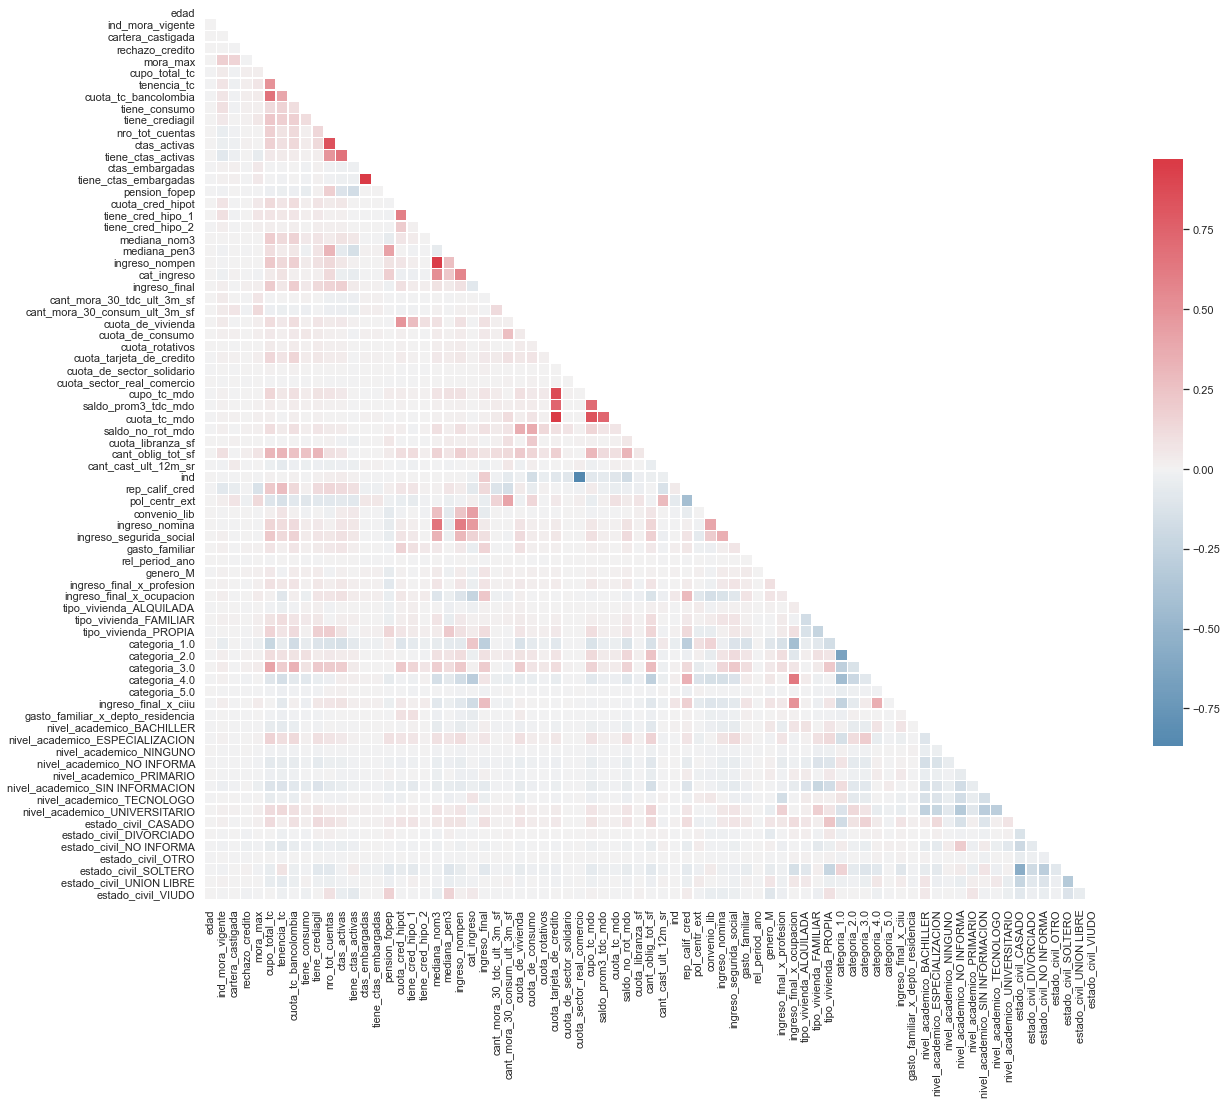

In [89]:
# correlations / mask
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# plot / cmap
fig, ax = plt.subplots(figsize = (20, 18))
cmap = sns.diverging_palette(240, 10, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, center = 0, square=True, linewidths = .5, cbar_kws = {"shrink": .6})

## Eliminamos una columna redundante

In [90]:
df.drop(columns='cuota_tarjeta_de_credito', inplace=True)

# Preparación para escalado

In [53]:
floatcols = df.select_dtypes('float').columns
floatcols

Index(['cupo_total_tc', 'cuota_tc_bancolombia', 'cuota_cred_hipot',
       'mediana_nom3', 'mediana_pen3', 'ingreso_nompen', 'ingreso_final',
       'cuota_de_vivienda', 'cuota_de_consumo', 'cuota_rotativos',
       'cuota_de_sector_solidario', 'cuota_sector_real_comercio',
       'cupo_tc_mdo', 'saldo_prom3_tdc_mdo', 'cuota_tc_mdo',
       'saldo_no_rot_mdo', 'cuota_libranza_sf', 'ind', 'ingreso_nomina',
       'ingreso_segurida_social', 'gasto_familiar', 'rel_period_ano',
       'ingreso_final_x_profesion', 'ingreso_final_x_ocupacion',
       'ingreso_final_x_ciiu', 'gasto_familiar_x_depto_residencia'],
      dtype='object')

In [51]:
numdf = df.select_dtypes(np.number)
numdf

,edad,ind_mora_vigente,cartera_castigada,rechazo_credito,mora_max,cupo_total_tc,tenencia_tc,cuota_tc_bancolombia,tiene_consumo,tiene_crediagil,nro_tot_cuentas,ctas_activas,tiene_ctas_activas,ctas_embargadas,tiene_ctas_embargadas,pension_fopep,cuota_cred_hipot,tiene_cred_hipo_1,tiene_cred_hipo_2,mediana_nom3,mediana_pen3,ingreso_nompen,cat_ingreso,ingreso_final,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,cuota_de_vivienda,cuota_de_consumo,cuota_rotativos,cuota_de_sector_solidario,cuota_sector_real_comercio,cupo_tc_mdo,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar,rel_period_ano,genero_M,ingreso_final_x_profesion,ingreso_final_x_ocupacion,tipo_vivienda_ALQUILADA,tipo_vivienda_FAMILIAR,tipo_vivienda_PROPIA,categoria_1.0,categoria_2.0,categoria_3.0,categoria_4.0,categoria_5.0,ingreso_final_x_ciiu,gasto_familiar_x_depto_residencia,nivel_academico_BACHILLER,nivel_academico_ESPECIALIZACION,nivel_academico_NINGUNO,nivel_academico_NO INFORMA,nivel_academico_PRIMARIO,nivel_academico_SIN INFORMACION,nivel_academico_TECNOLOGO,nivel_academico_UNIVERSITARIO,estado_civil_CASADO,estado_civil_DIVORCIADO,estado_civil_NO INFORMA,estado_civil_OTRO,estado_civil_SOLTERO,estado_civil_UNION LIBRE,estado_civil_VIUDO
3965564#201907,60,0,0,0,0,0.0,0,0.000,0,1,1,1,1,0,0,0,753023.3,1,0,4302445.0,0.0,4302445.0,1,4251824.00,0,0,753023.3,2340000.0,246000.0,0.0,0.0,0.0,0.0,0.0,46663000.0,0.0,3,0,-4.047465e+05,6,0,1,4189346.0,0.0,2968027.28,1.001663,1,1.009759,0.775483,0,0,0,1,0,0,0,0,0.818452,0.994211,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2297695#201911,60,0,0,0,16,0.0,0,0.000,0,1,1,1,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0,6399950.00,0,0,0.0,288000.0,132000.0,0.0,0.0,20800000.0,13306000.0,3010000.0,31505000.0,0.0,9,0,-4.470298e+05,7,0,0,0.0,0.0,5982828.00,0.984932,1,0.967875,0.775483,0,1,0,0,0,1,0,0,0.818452,0.994211,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2593020#201907,51,0,0,0,0,0.0,0,0.000,0,0,1,1,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0,2039000.00,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.039890e+06,5,0,0,0.0,0.0,111231.00,1.004672,1,1.000000,0.775483,0,0,0,1,0,0,0,0,0.818452,1.038546,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2317746#202003,51,0,0,0,1,0.0,0,0.000,0,0,1,1,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0,2355865.18,0,0,801000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10930000.0,0.0,1,0,4.004912e+05,1,8,0,0.0,0.0,247185.00,1.011170,1,1.011866,0.775483,0,0,0,1,0,0,0,0,0.818452,1.036614,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1327876#201907,51,0,0,0,0,15000000.0,1,645000.000,0,0,1,1,1,0,0,0,0.0,0,0,5036945.0,0.0,5036945.0,1,6533199.00,0,0,1186000.0,3372000.0,0.0,0.0,0.0,0.0,0.0,0.0,159999000.0,780000.0,3,0,-1.315747e+06,7,0,0,5042930.0,6210000.0,633835.00,0.993180,1,1.009759,0.775483,0,0,1,0,1,0,0,0,0.818452,0.994211,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832590#201910,63,0,0,0,0,0.0,0,0.000,0,0,1,1,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0,930000.00,0,0,0.0,0.0,0.0,0.0,0.0,6300000.0,15000.0,15000.0,128000.0,0.0,2,0,2.632500e+05,2,5,0,0.0,0.0,589041.00,0.998020,1,1.000000,0.775483,0,0,0,1,0,0,0,0,0.818452,0.989434,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2842173#202008,45,0,0,0,0,0.0,0,0.000,0,0,1,1,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0,1216468.32,0,0,0.0,0.0,0.0,0.0,1792000.0,0.0,0.0,0.0,1792000.0,0.0,0,2,-1.275001e+06,2,7,0,0.0,0.0,1768905.23,1.002555,0,1.009759,0.545991,0,0,0,1,0,0,0,0,0.818452,0.994211,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1991963#201908,45,0,0,0,16,2500000.0,1,154226.223,0,0,1,1,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0,2023536.00,1,0,0.0,184000.0,0.0,0.0,0.0,12690000.0,10408000.0,2129000.0,25543000.0,0.0,6,0,-2.198784e+05,5,6,0,0.0,0.0,1130000.00,1.009117,1,1.226442,0.775483,0,0,1,1,0,0,0,0,0.8

In [200]:
scaledf = pd.read_csv("scaledf.csv", index_col=0)
df = pd.read_csv("dfraw.csv", index_col=0)
dfiqr = pd.read_csv('dfiqr.csv', index_col=0)

In [4]:
scaledf_train = pd.read_csv('scaledf_train.csv', index_col=0)

In [201]:
dfiqr = df.copy()
dfiqr.head()

,edad,ind_mora_vigente,cartera_castigada,rechazo_credito,mora_max,cupo_total_tc,tenencia_tc,cuota_tc_bancolombia,tiene_consumo,tiene_crediagil,nro_tot_cuentas,ctas_activas,tiene_ctas_activas,ctas_embargadas,tiene_ctas_embargadas,pension_fopep,cuota_cred_hipot,tiene_cred_hipo_1,tiene_cred_hipo_2,mediana_nom3,mediana_pen3,ingreso_nompen,cat_ingreso,ingreso_final,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,cuota_de_vivienda,cuota_de_consumo,cuota_rotativos,cuota_de_sector_solidario,cuota_sector_real_comercio,cupo_tc_mdo,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar,rel_period_ano,genero_M,ingreso_final_x_profesion,ingreso_final_x_ocupacion,tipo_vivienda_ALQUILADA,tipo_vivienda_FAMILIAR,tipo_vivienda_PROPIA,categoria_1.0,categoria_2.0,categoria_3.0,categoria_4.0,categoria_5.0,ingreso_final_x_ciiu,gasto_familiar_x_depto_residencia,nivel_academico_BACHILLER,nivel_academico_ESPECIALIZACION,nivel_academico_NINGUNO,nivel_academico_NO INFORMA,nivel_academico_PRIMARIO,nivel_academico_SIN INFORMACION,nivel_academico_TECNOLOGO,nivel_academico_UNIVERSITARIO,estado_civil_CASADO,estado_civil_DIVORCIADO,estado_civil_NO INFORMA,estado_civil_OTRO,estado_civil_SOLTERO,estado_civil_UNION LIBRE,estado_civil_VIUDO
3965564#201907,60,0,0,0,0,0.0,0,0.0,0,1,1,1,1,0,0,0,753023.3,1,0,4302445.0,0.0,4302445.0,1,4251824.00,0,0,753023.3,2340000.0,246000.0,0.0,0.0,0.0,0.0,0.0,46663000.0,0.0,3,0,-4.047465e+05,6,0,1,4189346.0,0.0,2968027.28,1.001663,1,1.009759,0.775483,0,0,0,1,0,0,0,0,0.818452,0.994211,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2297695#201911,60,0,0,0,16,0.0,0,0.0,0,1,1,1,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0,6399950.00,0,0,0.0,288000.0,132000.0,0.0,0.0,20800000.0,13306000.0,3010000.0,31505000.0,0.0,9,0,-4.470298e+05,7,0,0,0.0,0.0,5982828.00,0.984932,1,0.967875,0.775483,0,1,0,0,0,1,0,0,0.818452,0.994211,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2593020#201907,51,0,0,0,0,0.0,0,0.0,0,0,1,1,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0,2039000.00,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.039890e+06,5,0,0,0.0,0.0,111231.00,1.004672,1,1.000000,0.775483,0,0,0,1,0,0,0,0,0.818452,1.038546,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2317746#202003,51,0,0,0,1,0.0,0,0.0,0,0,1,1,1,0,0,0,0.0,0,0,0.0,0.0,0.0,0,2355865.18,0,0,801000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10930000.0,0.0,1,0,4.004912e+05,1,8,0,0.0,0.0,247185.00,1.011170,1,1.011866,0.775483,0,0,0,1,0,0,0,0,0.818452,1.036614,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1327876#201907,51,0,0,0,0,15000000.0,1,645000.0,0,0,1,1,1,0,0,0,0.0,0,0,5036945.0,0.0,5036945.0,1,6533199.00,0,0,1186000.0,3372000.0,0.0,0.0,0.0,0.0,0.0,0.0,159999000.0,780000.0,3,0,-1.315747e+06,7,0,0,5042930.0,6210000.0,633835.00,0.993180,1,1.009759,0.775483,0,0,1,0,1,0,0,0,0.818452,0.994211,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [202]:
floatdf = dfiqr.select_dtypes('float')

In [203]:
floatdf = floatdf.drop(columns = "gasto_familiar")

# Escalado
Dividimos los datos que van a ser escalados y los que no

In [204]:
from sklearn.preprocessing import RobustScaler

In [205]:
trans = RobustScaler()
regularized = trans.fit_transform(floatdf)

In [206]:
scaled = pd.DataFrame(regularized, index = floatdf.index, columns = floatdf.columns)
scaled

,cupo_total_tc,cuota_tc_bancolombia,cuota_cred_hipot,mediana_nom3,mediana_pen3,ingreso_nompen,ingreso_final,cuota_de_vivienda,cuota_de_consumo,cuota_rotativos,cuota_de_sector_solidario,cuota_sector_real_comercio,cupo_tc_mdo,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,ind,ingreso_nomina,ingreso_segurida_social,rel_period_ano,ingreso_final_x_profesion,ingreso_final_x_ocupacion,ingreso_final_x_ciiu,gasto_familiar_x_depto_residencia
3965564#201907,0.000000,0.000000,753023.3,2.887621,0.0,2.458242,0.440189,753023.3,4.875000,246000.0,0.0,0.0,0.000000,0.000000,0.000000,3.456294,0.0,-0.624460,4.842684,0.000000,0.380413,0.000000,0.000000,0.000000,1.000000
2297695#201911,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.072793,0.0,0.600000,132000.0,0.0,0.0,3.127820,10.832564,16.722222,2.330561,0.0,-0.647326,0.000000,0.000000,-2.190651,-3.529769,0.000000,0.000000,1.000000
2593020#201907,0.000000,0.000000,0.0,0.000000,0.0,0.000000,-0.211468,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.009209,0.0,0.156781,0.000000,0.000000,0.842795,-0.822457,0.000000,0.000000,10.281969
2317746#202003,0.000000,0.000000,0.0,0.000000,0.0,0.000000,-0.118155,801000.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.802525,0.0,-0.188998,0.000000,0.000000,1.841287,0.177543,0.000000,0.000000,9.877450
1327876#201907,3.191489,3.270791,0.0,3.380586,0.0,2.877906,1.112033,1186000.0,7.025000,0.0,0.0,0.0,0.000000,0.000000,0.000000,11.873375,780000.0,-1.117117,5.829386,7.498949,-0.923189,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832590#201910,0.000000,0.000000,0.0,0.000000,0.0,0.000000,-0.538059,0.0,0.000000,0.0,0.0,0.0,0.947368,0.012212,0.083333,0.000297,0.0,-0.263216,0.000000,0.000000,-0.179448,-0.822457,0.000000,0.000000,0.000000
2842173#202008,0.000000,0.000000,0.0,0.000000,0.0,0.000000,-0.453697,0.0,0.000000,0.0,0.0,1792000.0,0.000000,0.000000,0.000000,0.123877,0.0,-1.095082,0.000000,0.000000,0.517472,0.000000,-4.031337,0.000000,1.000000
1991963#201908,0.531915,0.782080,0.0,0.000000,0.0,0.000000,-0.216022,0.0,0.383333,0.0,0.0,0.0,1.908271,8.473270,11.827778,1.887783,0.0,-0.524486,0.000000,0.000000,1.525824,18.260682,0.000000,0.000000,-5.591935
3194942#201909,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.996534,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.009209,0.0,1.570401,0.000000,0.000000,-0.866316,-0.822457,16.845764,0.772194,-2.453315


### Combinamos los datos escalados con los encodings y la variable respuesta

In [207]:
scaledf = pd.concat([dfiqr.select_dtypes(exclude='float'),scaled, dfiqr["gasto_familiar"]], axis = 1)
scaledf.head(5)

,edad,ind_mora_vigente,cartera_castigada,rechazo_credito,mora_max,tenencia_tc,tiene_consumo,tiene_crediagil,nro_tot_cuentas,ctas_activas,tiene_ctas_activas,ctas_embargadas,tiene_ctas_embargadas,pension_fopep,tiene_cred_hipo_1,tiene_cred_hipo_2,cat_ingreso,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,rep_calif_cred,pol_centr_ext,convenio_lib,genero_M,tipo_vivienda_ALQUILADA,tipo_vivienda_FAMILIAR,tipo_vivienda_PROPIA,categoria_1.0,categoria_2.0,categoria_3.0,categoria_4.0,categoria_5.0,nivel_academico_BACHILLER,nivel_academico_ESPECIALIZACION,nivel_academico_NINGUNO,nivel_academico_NO INFORMA,nivel_academico_PRIMARIO,nivel_academico_SIN INFORMACION,nivel_academico_TECNOLOGO,nivel_academico_UNIVERSITARIO,estado_civil_CASADO,estado_civil_DIVORCIADO,estado_civil_NO INFORMA,estado_civil_OTRO,estado_civil_SOLTERO,estado_civil_UNION LIBRE,estado_civil_VIUDO,cupo_total_tc,cuota_tc_bancolombia,cuota_cred_hipot,mediana_nom3,mediana_pen3,ingreso_nompen,ingreso_final,cuota_de_vivienda,cuota_de_consumo,cuota_rotativos,cuota_de_sector_solidario,cuota_sector_real_comercio,cupo_tc_mdo,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,ind,ingreso_nomina,ingreso_segurida_social,rel_period_ano,ingreso_final_x_profesion,ingreso_final_x_ocupacion,ingreso_final_x_ciiu,gasto_familiar_x_depto_residencia,gasto_familiar
3965564#201907,60,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,3,0,6,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0.000000,0.000000,753023.3,2.887621,0.0,2.458242,0.440189,753023.3,4.875,246000.0,0.0,0.0,0.00000,0.000000,0.000000,3.456294,0.0,-0.624460,4.842684,0.000000,0.380413,0.000000,0.0,0.0,1.000000,2968027.28
2297695#201911,60,0,0,0,16,0,0,1,1,1,1,0,0,0,0,0,0,0,0,9,0,7,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.072793,0.0,0.600,132000.0,0.0,0.0,3.12782,10.832564,16.722222,2.330561,0.0,-0.647326,0.000000,0.000000,-2.190651,-3.529769,0.0,0.0,1.000000,5982828.00
2593020#201907,51,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,-0.211468,0.0,0.000,0.0,0.0,0.0,0.00000,0.000000,0.000000,-0.009209,0.0,0.156781,0.000000,0.000000,0.842795,-0.822457,0.0,0.0,10.281969,111231.00
2317746#202003,51,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,8,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,-0.118155,801000.0,0.000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.802525,0.0,-0.188998,0.000000,0.000000,1.841287,0.177543,0.0,0.0,9.877450,247185.00
1327876#201907,51,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,3,0,7,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,3.191489,3.270791,0.0,3.380586,0.0,2.877906,1.112033,1186000.0,7.025,0.0,0.0,0.0,0.00000,0.000000,0.000000,11.873375,780000.0,-1.117117,5.829386,7.498949,-0.923189,0.000000,0.0,0.0,1.000000,633835.00


### Transformación Logarítmica

In [208]:
scaledf = scaledf.loc[scaledf['gasto_familiar'] > 0]

In [209]:
df.shape

(3146534, 74)

In [210]:
scaledf.shape

(2951508, 74)

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 916080.42 and sigma = 2600712.12



C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 13.03 and sigma = 1.20



Text(0.5, 0.98, 'Después de la transformación')

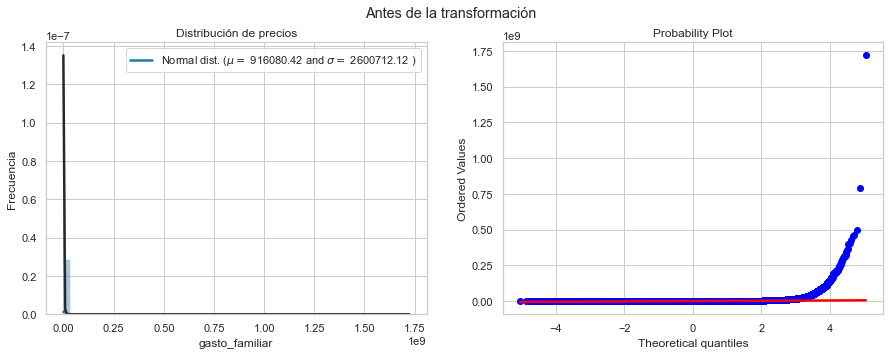

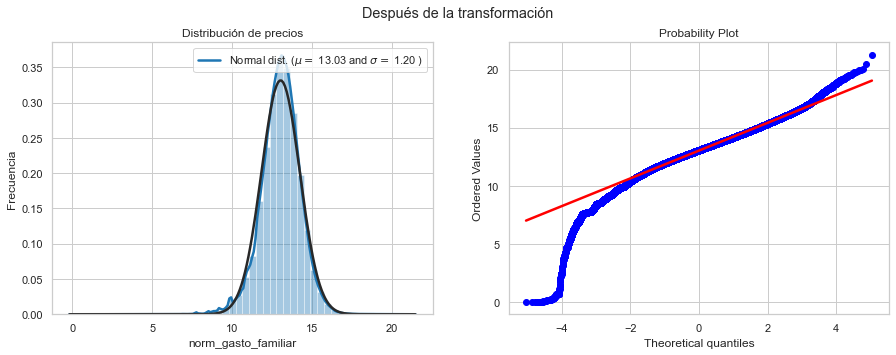

In [173]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# Plot histogram and probability
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(scaledf['gasto_familiar'] , fit=norm);
(mu, sigma) = norm.fit(scaledf['gasto_familiar'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frecuencia')
plt.title('Distribución de precios')
plt.subplot(1,2,2)
res = stats.probplot(scaledf['gasto_familiar'], plot=plt)
plt.suptitle('Antes de la transformación')

# Apply transformation
scaledf['norm_gasto_familiar'] = np.log1p(scaledf['gasto_familiar'])
# New prediction
y_train = scaledf['gasto_familiar'].values
y_train_orig = scaledf['gasto_familiar']


# Plot histogram and probability after transformation
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(scaledf['norm_gasto_familiar'] , fit=norm);
(mu, sigma) = norm.fit(scaledf['norm_gasto_familiar'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
plt.ylabel('Frecuencia')
plt.title('Distribución de precios')
plt.subplot(1,2,2)
res = stats.probplot(scaledf['norm_gasto_familiar'], plot=plt)
plt.suptitle('Después de la transformación')

# Poly feats y PCA

In [174]:
X = scaledf.drop(columns= ['gasto_familiar','norm_gasto_familiar'])
y = scaledf["gasto_familiar"]

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### PCA

In [176]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = len(X.columns))
covar_matrix.fit(X)

PCA(n_components=73)

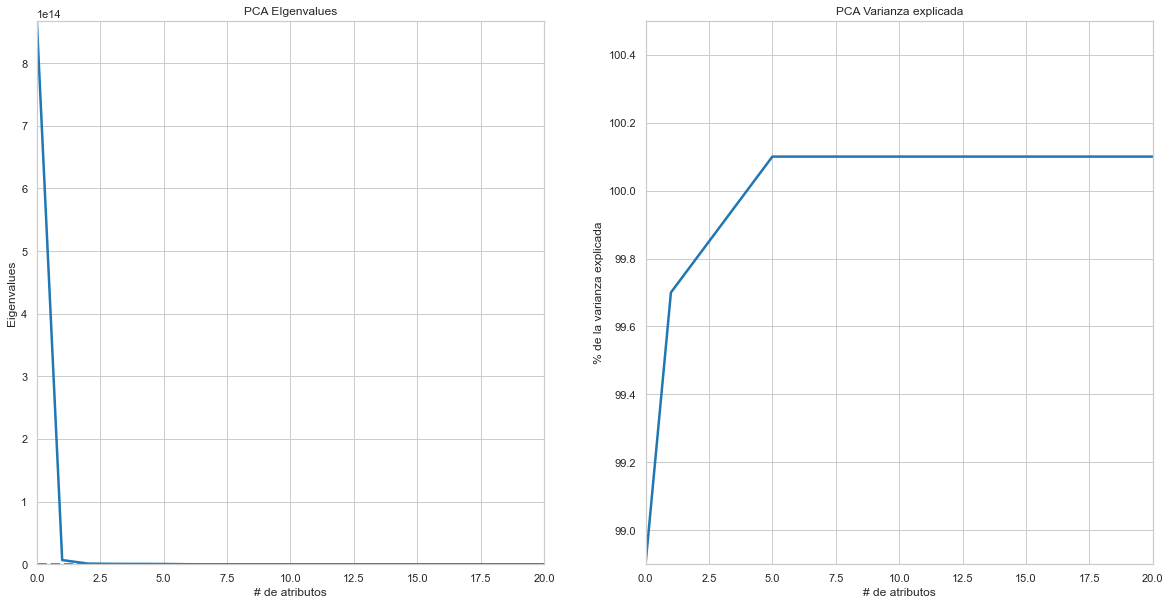

In [177]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.ylabel('Eigenvalues')
plt.xlabel('# de atributos')
plt.title('PCA EIgenvalues')
plt.xlim(0,20)
plt.ylim(0,max(covar_matrix.explained_variance_))
plt.axhline(y = 1, color = 'r', linestyle = '--')
plt.plot(covar_matrix.explained_variance_)

variance = covar_matrix.explained_variance_ratio_
var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals = 3)*100)

plt.subplot(1,2,2)
plt.ylabel('% de la varianza explicada')
plt.xlabel('# de atributos')
plt.title('PCA Varianza explicada')
plt.xlim(0,20)
plt.ylim(min(var), 100.5)
plt.axhline(y = 80, color = 'r', linestyle = '--')
plt.plot(var)

Notamos que gran parte de la varianza se explica con los primeros 3 componentes principales, como veíamos anteriormente. Sin embargo, buscamos ahora dar con un modelo que supere el baseline y al no ser tantas variables, no tenemos problema aún con el tiempo de procesamiento. Como el porcentaje de varianza predicha se detiene cerca de los 40 atributos, vamos a utilizar esa cantidad para el modelo.

In [178]:
poly_pca = PCA(n_components = 6)
X_poly_pca = poly_pca.fit_transform(X) 

In [179]:
df_comp = pd.DataFrame(poly_pca.components_, columns = X.columns)

In [180]:
X_poly_pca_df = pd.DataFrame(X_poly_pca)
X_poly_pca_df

,0,1,2,3,4,5
0,-3.337242e+05,-52782.858236,-80235.894998,-55433.051929,786991.871567,127828.181785
1,-3.337252e+05,-53392.526986,-83849.262315,-150729.207987,-141586.405141,138182.075445
2,-3.337312e+05,-53531.709118,-84351.278652,-163804.132089,-157613.718562,7814.744710
3,-3.337265e+05,-52940.234792,-80782.104260,-93203.050856,604522.028557,-92141.653879
4,-3.335064e+05,-52553.370111,699416.812638,-107824.308748,972214.750604,-138486.634290
...,...,...,...,...,...,...
2951503,-3.337312e+05,-53531.709117,-84351.278650,-163804.132076,-157613.718577,7814.744712
2951504,1.458269e+06,-53554.685512,-84852.076675,-163796.128577,-157627.543359,7735.137811
2951505,-3.337312e+05,-53531.709115,-84351.278641,-163804.132058,-157613.718528,7814.744721
2951506,-3.337312e+05,-53531.709118,-84351.278655,-163804.132080,-157613.718576,7814.744711


<AxesSubplot:>

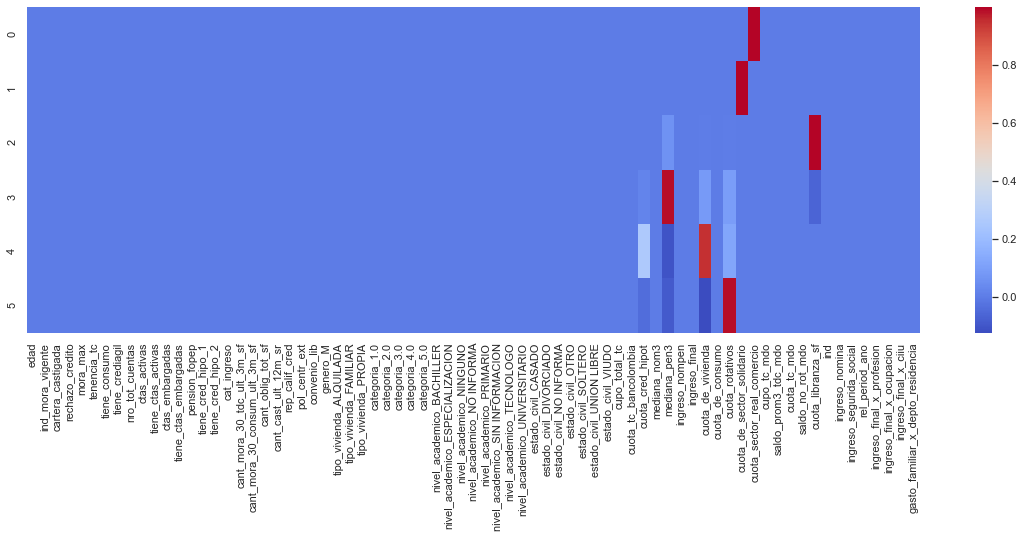

In [181]:
plt.figure(figsize=(20,6))
sns.heatmap(df_comp, cmap='coolwarm')

In [182]:
scaledf.shape

(2951508, 75)

# Correlaciones

In [112]:
!pip install ppscore

In [160]:
import ppscore as pps
pps.score(scaledf, "gasto_familiar_x_depto_residencia", "gasto_familiar")

{'x': 'gasto_familiar_x_depto_residencia',
 'y': 'gasto_familiar',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 682443.1672639999,
 'model_score': 796046.2865972932,
 'model': DecisionTreeRegressor()}

In [161]:
pps.predictors(scaledf, "gasto_familiar")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,norm_gasto_familiar,gasto_familiar,0.980015,regression,True,mean absolute error,682443.167264,13638.681443,DecisionTreeRegressor()
1,edad,gasto_familiar,0.000000,regression,True,mean absolute error,682443.167264,810156.994489,DecisionTreeRegressor()
2,ind_mora_vigente,gasto_familiar,0.000000,regression,True,mean absolute error,682443.167264,789699.157863,DecisionTreeRegressor()
3,cartera_castigada,gasto_familiar,0.000000,regression,True,mean absolute error,682443.167264,789924.622159,DecisionTreeRegressor()
4,rechazo_credito,gasto_familiar,0.000000,regression,True,mean absolute error,682443.167264,790353.247598,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
69,rel_period_ano,gasto_familiar,0.000000,regression,True,mean absolute error,682443.167264,797027.155580,DecisionTreeRegressor()
70,ingreso_final_x_profesion,gasto_familiar,0.000000,regression,True,mean absolute error,682443.167264,799151.273876,DecisionTreeRegressor()
71,ingreso_final_x_ocupacion,gasto_familiar,0.000000,regression,True,mean absolute error,682443.167264,782581.049779,DecisionTreeRegressor()
72,ingreso_final_x_ciiu,gasto_familiar,0.000000,regression,True,mean absolute error,682443.167264,804570.347957,DecisionTreeRegressor()


### Guardamos los dataset (cuidado con no guardar los que tienen log transform)


In [117]:
# Credits to Mariano & Gaspar
scaledf.to_csv('scaledf.csv', index=True)
df.to_csv('dfraw.csv', index=True)
dfiqr.to_csv('dfiqr.csv', index=True)

# Modelos

In [8]:
scaledf_train = pd.read_csv("scaledf_train.csv", index_col=0)
scaledf_test = pd.read_csv("scaledf_test.csv", index_col=0)

In [9]:
scaledf_train.shape

(1004049, 75)

In [10]:
scaledf_test.shape

(281666, 75)

In [1]:
# Librerías de toda la vida
import itertools
from tqdm import tqdm
from collections import defaultdict
from collections import Counter
import random
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from scipy import stats
from dask import dataframe as dd
from dask.diagnostics import ProgressBar
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.style as style
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale = 1, rc = {"lines.linewidth": 2.5})

#from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA

from bayes_opt import BayesianOptimization
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import mean_absolute_percentage_error

In [11]:
%%time
X = scaledf_train.drop(columns= ['gasto_familiar'])
y = scaledf_train['gasto_familiar']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Wall time: 1.43 s


In [12]:
def val_model(model,x_train,x_test,y_train,y_test):
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    rmse_test =  np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
    mape_train = metrics.mean_absolute_percentage_error(y_train, y_train_pred)
    mape_test = metrics.mean_absolute_percentage_error(y_test, y_test_pred)
    
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    print(f'MAPE Train: {mape_train}')
    print(f'MAPE Test: {mape_test}')
    
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()
    
    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
            np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.tight_layout()
    plt.show()

In [13]:
XGBre = XGBRegressor()
XGBre.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Raíz del error cuadrático medio en Train: 331642.375783495
Raíz del error cuadrático medio en Test: 336394.5354602973
MAPE Train: 101.70013604926922
MAPE Test: 24.421278422012836


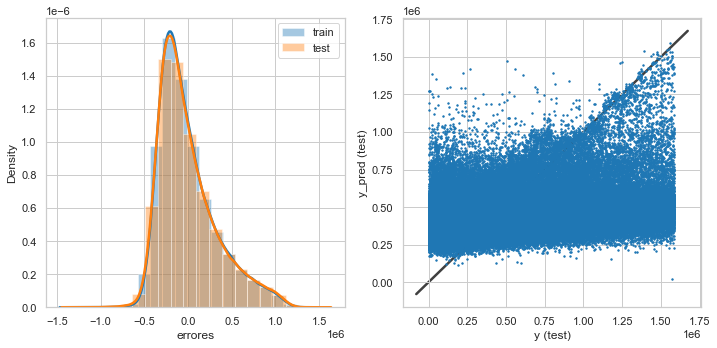

In [14]:
val_model(XGBre,X_train,X_test,y_train,y_test)

Raíz del error cuadrático medio en Train: 329279.57322117395
Raíz del error cuadrático medio en Test: 338006.6156183384
MAPE Train: 22.985457529843856
MAPE Test: 64.58996829626652


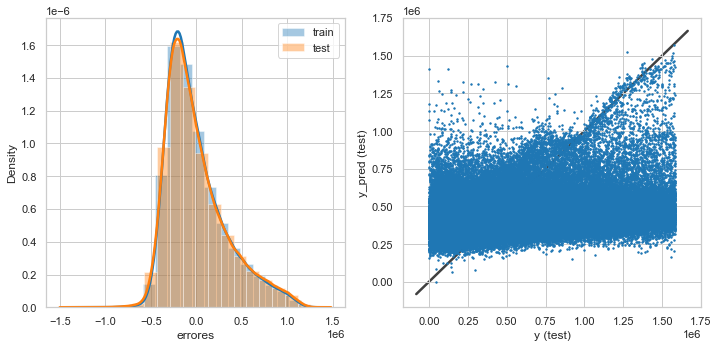

In [8]:
val_model(XGBre,X_train,X_test,y_train,y_test)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

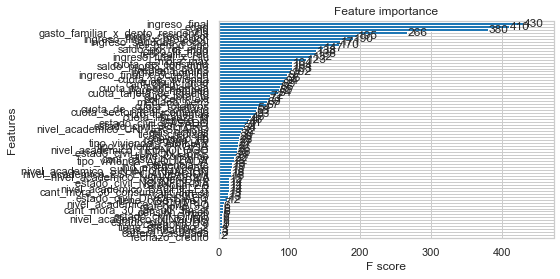

In [222]:
from xgboost import plot_importance
plot_importance(XGBre, height = 1)

## LightGBM

In [17]:
param_lgbm = {
     'bagging_fraction': 0.5636740342598963,
     'feature_fraction': 0.37011678015410476,
     'learning_rate': 0.02338383151757914,
     'max_depth': int(13.85),
     'min_child_weight': int(21.49),
     'min_split_gain': 0.07374879816811401,
     'num_leaves': int(46.37),
     'application':'regression',
     'num_iterations': 5000,
     'metric': 'rmse'}

In [20]:
import lightgbm
lgbmax = lightgbm.LGBMRegressor(**param_lgbm, random_state=RANDOM_SEED, n_jobs=-1)

In [195]:
lgbmax.fit(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.37011678015410476, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.37011678015410476
[LightGBM] [Warning] bagging_fraction is set=0.5636740342598963, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5636740342598963


LGBMRegressor(application='regression', bagging_fraction=0.5636740342598963,
              feature_fraction=0.37011678015410476,
              learning_rate=0.02338383151757914, max_depth=13, metric='rmse',
              min_child_weight=21, min_split_gain=0.07374879816811401,
              num_iterations=5000, num_leaves=46, random_state=42)

In [196]:
from sklearn.metrics import make_scorer
scoring = {'MAE': 'neg_mean_absolute_error',
           'MSE': 'neg_mean_squared_error',
           'RMSE': 'neg_root_mean_squared_error',
          'R2': 'r2'}

In [198]:
scores = cross_validate(lgbmax, X, y, scoring = scoring,
                        cv = 5, return_train_score = True)
for key in scores.keys():
    print(f'{key}: {(scores[key].mean())}')
scores.keys()

[LightGBM] [Warning] feature_fraction is set=0.37011678015410476, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.37011678015410476
[LightGBM] [Warning] bagging_fraction is set=0.5636740342598963, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5636740342598963
[LightGBM] [Warning] feature_fraction is set=0.37011678015410476, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.37011678015410476
[LightGBM] [Warning] bagging_fraction is set=0.5636740342598963, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5636740342598963
[LightGBM] [Warning] feature_fraction is set=0.37011678015410476, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.37011678015410476
[LightGBM] [Warning] bagging_fraction is set=0.5636740342598963, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5636740342598963
[LightGBM] [Warning] feature_fraction is set=0.37011678015410476, colsample_bytree=1.0 will

dict_keys(['fit_time', 'score_time', 'test_MAE', 'train_MAE', 'test_MSE', 'train_MSE', 'test_RMSE', 'train_RMSE', 'test_R2', 'train_R2'])

Raíz del error cuadrático medio en Train: 2294838.4172930964
Raíz del error cuadrático medio en Test: 2954037.212823439
MAPE Train: 146.12006050234737
MAPE Test: 666.1504457754631


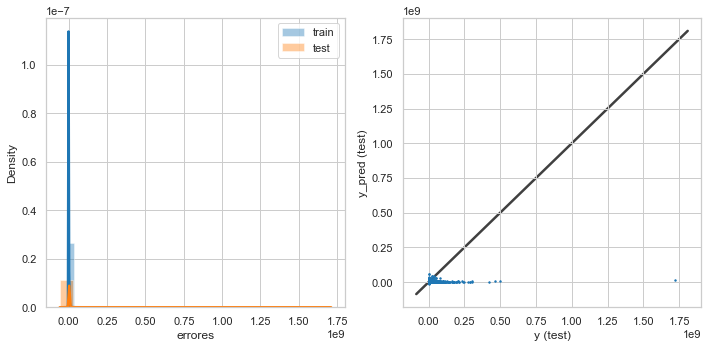

In [199]:
val_model(lgbmax,X_train,X_test,y_train,y_test)

In [19]:
RANDOM_SEED = 42

In [15]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(iterations=1000)

In [225]:
model = [cat]
for mod in model:
    score = cross_val_score(mod, X, y, cv=3, scoring = "neg_root_mean_squared_error", n_jobs=-1)
    print("CAT RMSE Mean Score: ", np.mean(score))

CAT RMSE Mean Score:  -336579.67732623534


In [32]:
import lightgbm
lgbm = lightgbm.LGBMRegressor(random_state=RANDOM_SEED, n_jobs=-1, metric= 'rmse')

In [33]:
model = [lgbm]
for mod in model:
    score = cross_val_score(mod, X, y, cv=3, scoring="neg_root_mean_squared_error", n_jobs=-1)
    print("LGBM RMSE Mean Score: ", np.mean(score))

LGBM RMSE Mean Score:  -3.2888857014323363


In [35]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(random_state = RANDOM_SEED)

In [36]:
model = [xgbr]
for mod in model:
    score = cross_val_score(mod, X, y, cv=3, scoring="neg_root_mean_squared_error", n_jobs=-1)
    print("XGB RMSE Mean Score: ", np.mean(score))

XGB RMSE Mean Score:  -3.2905931682804996


Now we will use Bayesian Optimization to tune the hyperparameter. Our goal is to minimize RMSE, but Bayesian Optimization here only support maximizing, so that's why we add a minus sign in the RMSE, so maximizing the minus RMSE is equal to minimizing the RMSE. Just a matter of sign.

You can also adjust what parameter you want to tune and the range of hyperparameter. You can also how many point or how many try during the optimization. 

## LGBM Tuning

In [226]:
dtrain = lightgbm.Dataset(data=X, label=y)

def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight, learning_rate):
      
        params = {'application':'regression','num_iterations': 5000,
                  'early_stopping_round':100, 'metric':'rmse'}
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight
        params['learning_rate'] = learning_rate
        cv_result = lightgbm.cv(params, dtrain, nfold=3, 
                                seed=RANDOM_SEED, stratified=False, 
                                verbose_eval =None, metrics=['rmse'])
        
        return -np.min(cv_result['rmse-mean'])

In [227]:
pds = {
    'num_leaves': (5, 50),
    'feature_fraction': (0.2, 1),
    'bagging_fraction': (0.2, 1),
    'max_depth': (2, 20),
    'min_split_gain': (0.001, 0.1),
    'min_child_weight': (10, 50),
    'learning_rate': (0.01, 0.5),
      }

In [228]:
optimizer = BayesianOptimization(hyp_lgbm,pds,random_state=RANDOM_SEED)
optimizer.maximize(init_points=10, n_iter=50)

|   iter    |  target   | baggin... | featur... | learni... | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6081
[LightGBM] [Info] Number of data points in the train set: 446284, number of used features: 74
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6081
[LightGBM] [Info] Number of data points in the train set: 446284, number of used

In [229]:
optimizer.max['params']

{'bagging_fraction': 0.5636740342598963,
 'feature_fraction': 0.37011678015410476,
 'learning_rate': 0.02338383151757914,
 'max_depth': 13.856924696061904,
 'min_child_weight': 21.498089006252687,
 'min_split_gain': 0.07374879816811401,
 'num_leaves': 46.3798651358829}

## CAT Tuning

In [41]:
import catboost as cgb

def cat_hyp(depth, bagging_temperature, l2_leaf_reg, learning_rate):
  params = {"iterations": 100,
            "loss_function": "RMSE",
            "verbose": False} 
  params["depth"] = int(round(depth)) 
  params["bagging_temperature"] = bagging_temperature
  params["learning_rate"] = learning_rate
  params["l2_leaf_reg"] = l2_leaf_reg
  
  cat_feat = [] # Categorical features list, we have nothing in this dataset
  cv_dataset = cgb.Pool(data=X,
                        label=y,
                        cat_features=cat_feat)

  scores = cgb.cv(cv_dataset,
              params,
              fold_count=3)
  return -np.min(scores['test-RMSE-mean']) 

In [42]:
# Search space
pds = {'depth': (4, 10),
       'bagging_temperature': (0.1,10),
       'l2_leaf_reg': (0.1, 10),
       'learning_rate': (0.1, 0.2)
        }

In [43]:
optimizer = BayesianOptimization(cat_hyp, pds, random_state=RANDOM_SEED)
optimizer.maximize(init_points=10, n_iter=50)

|   iter    |  target   | baggin... |   depth   | l2_lea... | learni... |
-------------------------------------------------------------------------
|  1        | -3.288    |  3.808    |  9.704    |  7.347    |  0.1599   |
|  2        | -3.291    |  1.645    |  4.936    |  0.675    |  0.1866   |
|  3        | -3.288    |  6.051    |  8.248    |  0.3038   |  0.197    |
|  4        | -3.293    |  8.341    |  5.274    |  1.9      |  0.1183   |
|  5        | -3.291    |  3.112    |  7.149    |  4.376    |  0.1291   |
|  6        | -3.293    |  6.157    |  4.837    |  2.992    |  0.1366   |
|  7        | -3.289    |  4.615    |  8.711    |  2.077    |  0.1514   |
|  8        | -3.295    |  5.965    |  4.279    |  6.115    |  0.1171   |
|  9        | -3.288    |  0.744    |  9.693    |  9.66     |  0.1808   |
|  10       | -3.292    |  3.116    |  4.586    |  6.874    |  0.144    |
|  11       | -3.288    |  0.1      |  10.0     |  6.052    |  0.2      |
|  12       | -3.29     |  0.1      | 

In [44]:
optimizer.max['params']

{'bagging_temperature': 8.201189624640985,
 'depth': 10.0,
 'l2_leaf_reg': 4.679799490576993,
 'learning_rate': 0.2}

In [ ]:
param_cat = {
     'bagging_temperature': 8.201189624640985,
     'depth': int(10.0),
     'l2_leaf_reg': 4.679799490576993,
     'learning_rate': 0.2,
     'iterations': 100,
     'loss_function': 'RMSE',
     'verbose': False

## XGB Tuning

In [230]:
import xgboost as xgb

dtrain = xgb.DMatrix(X, y, feature_names=X.columns.values)

def hyp_xgb(max_depth, subsample, colsample_bytree,min_child_weight, gamma, learning_rate):
    params = {
    'objective': 'reg:squarederror',
    'eval_metric':'rmse',
    'nthread':-1
     }
    
    params['max_depth'] = int(round(max_depth))
    params['subsample'] = max(min(subsample, 1), 0)
    params['colsample_bytree'] = max(min(colsample_bytree, 1), 0)
    params['min_child_weight'] = int(min_child_weight)
    params['gamma'] = max(gamma, 0)
    params['learning_rate'] = learning_rate
    scores = xgb.cv(params, dtrain, num_boost_round=500,verbose_eval=False, 
                    early_stopping_rounds=10, nfold=3)
    return -scores['test-rmse-mean'].iloc[-1]

In [231]:
pds ={
  'min_child_weight':(3, 20),
  'gamma':(0, 5),
  'subsample':(0.7, 1),
  'colsample_bytree':(0.1, 1),
  'max_depth': (3, 10),
  'learning_rate': (0.01, 0.5)
}

In [232]:
optimizer = BayesianOptimization(hyp_xgb, pds, random_state=RANDOM_SEED)
optimizer.maximize(init_points=4, n_iter=15)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -3.372e+0 |  0.4371   |  4.754    |  0.3687   |  7.191    |  5.652    |  0.7468   |
|  2        | -3.374e+0 |  0.1523   |  4.331    |  0.3045   |  7.957    |  3.35     |  0.991    |
|  3        | -3.364e+0 |  0.8492   |  1.062    |  0.09909  |  4.284    |  8.172    |  0.8574   |
|  4        | -3.367e+0 |  0.4888   |  1.456    |  0.3098   |  3.976    |  7.966    |  0.8099   |
|  5        | -3.37e+05 |  1.0      |  0.3994   |  0.01     |  4.797    |  8.519    |  0.9361   |
|  6        | -3.365e+0 |  0.8384   |  1.082    |  0.2623   |  4.466    |  7.861    |  0.9497   |
|  7        | -3.37e+05 |  1.0      |  1.591    |  0.01     |  4.543    |  8.344    |  0.8406   |
|  8        | -3.37e+05 |  0.8106   |  2.678    |  0.4484   |  6.201    |  10.18    |  0.8961   |
|  9        | -3.367

In [233]:
optimizer.max['params']

{'colsample_bytree': 0.4947060286035553,
 'gamma': 4.905352182459558,
 'learning_rate': 0.13974009733978268,
 'max_depth': 6.674093347342247,
 'min_child_weight': 7.792380767140144,
 'subsample': 0.8713907220226325}

## Stacking

We will use the best parameter as a learner and use Linear Regression as the meta-learner. You can also tune the meta-learner parameter. Also, make sure to convert some parameters into an integer.

In [3]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

In [21]:
param_lgbm = {
     'bagging_fraction': 0.5636740342598963,
     'feature_fraction': 0.37011678015410476,
     'learning_rate': 0.02338383151757914,
     'max_depth': int(13.85),
     'min_child_weight': int(21.49),
     'min_split_gain': 0.07374879816811401,
     'num_leaves': int(46.37),
     'application':'regression',
     'num_iterations': 5000,
     'metric': 'rmse'
}

param_cat = {
     'bagging_temperature': 8.201189624640985,
     'depth': int(10.0),
     'l2_leaf_reg': 4.679799490576993,
     'learning_rate': 0.2,
     'iterations': 100,
     'loss_function': 'RMSE',
     'verbose': False
}

param_xgb = {
     'colsample_bytree': 0.4947060286035553,
     'gamma': 4.905352182459558,
     'learning_rate': 0.13974009733978268,
     'max_depth': int(6.674),
     'min_child_weight': int(7.792),
     'subsample': 0.8713907220226325,
     'objective': 'reg:squarederror',
     'eval_metric':'rmse',
     'num_boost_roun' : 500
}

In [22]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import svm
import lightgbm

In [23]:
estimators = [
        ('lgbm', lightgbm.LGBMRegressor(**param_lgbm, random_state=RANDOM_SEED, n_jobs=-1)),
        ('xgbr', XGBRegressor(**param_xgb, random_state=RANDOM_SEED, nthread=-1)),
        ('cat', CatBoostRegressor(**param_cat)),
        ('mlp', MLPRegressor()) # without tuning
]

In [24]:
reg = StackingRegressor(
    estimators = estimators,
    final_estimator = LinearRegression(),
    n_jobs = -1,
    cv = 3
)

reg.fit(X, y)

StackingRegressor(cv=3,
                  estimators=[('lgbm',
                               LGBMRegressor(application='regression',
                                             bagging_fraction=0.5636740342598963,
                                             feature_fraction=0.37011678015410476,
                                             learning_rate=0.02338383151757914,
                                             max_depth=13, metric='rmse',
                                             min_child_weight=21,
                                             min_split_gain=0.07374879816811401,
                                             num_iterations=5000, num_leaves=46,
                                             random_state=42)),
                              ('xgbr',
                               XGBRegressor(base_s...
                                            n_estimators=100, n_jobs=None,
                                            nthread=-1, num_boost_roun=500,
           

In [29]:
predictions = reg.predict(scaledf_test)

In [30]:
kaggle_submission_y = pd.DataFrame(predictions)
kaggle_submission_y.index = scaledf_test.index
kaggle_submission_y.index.name = 'id_registro'
kaggle_submission_y = kaggle_submission_y.rename(columns={0: 'gasto_familiar'})
kaggle_submission_y.to_csv("kaggle_submission_y4.csv")

In [31]:
sample['target'] = y_pred
sample.to_csv("submission.csv", index=False)